## Bank Loan Modelling
Y. P. Allen

Background and Context

The bank has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of **converting its liability customers to personal loan customers** (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

**Objective:**

1. To predict whether a liability customer will buy a **personal loan** or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

**Variables:**
- ID: Customer ID
- Age: Customer’s age 
- Experience: # of years of professional experience
- Income: Annual income of the customer (in thousand US Dollars)
- ZIP Code: Home Address ZIP code
- Family: Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand US Dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any (in thousand US Dollars)
- **Personal_Loan**: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have a securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
- Online: Do customers use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding The Bank)?


## Load Data and Initial Data Exploration

In [236]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

In [237]:
# Read in raw csv file for analysis
loaners = pd.read_csv('Loan_Modelling.csv')

In [238]:
# Copy data to another varaible to avoid any changes to original data
data=loaners.copy()

In [239]:
# Check top rows of raw data
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [240]:
# Check the bottom rows of the raw data
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [241]:
# Confirm the dimensions of the raw data
data.shape

(5000, 14)

In [242]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

**Observations:**
- There are 5000 rows in the raw data and 14 columns.
- There ae 480 Customers out of 5000 who have a Personal Loan. That is 9.6% of the sample.

In [243]:
# Are there any null values?
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**

There are no null/NaN values in the raw data.

In [351]:
# Check for duplicates in the raw data
data[data.duplicated()].count()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
dtype: int64

**Observation:**
- There are no duplicates in this data.

In [244]:
# Check variable summary
data.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [245]:
# Confirm datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


**Observations:**
1. All of the variables are numeric.
2. The dependent variable **Personal_Loan** is an integer.
3. Most of the independent variables are integer values. Only CCAvg is a float value.
4. Experience has a negative minimum value.
5. Personal loan, Securites_Account, CD_Account, Online, and CreditCard all have a minimum value of 0 and maximum value of 1. These are Booleans.
6. Family has a minimum value of 1 and maximum value of 4. The average family size is 2.39.
7. The customer income ranges from 8,000 to 224,000 USD, with an average of 73,700 USD.
8. The customer age ranges from 23 to 67 years old with a mean of 45 years.
9. The customer's years of professional experience ranges from -3 to 43 years with an average of 20 years. The negative values may be a default to designate an unknown number of years. The Median value will have to be recalculated after editing these values.
10. The Zip codes of this data range from 90005 to 96651. These do not provide valuable insight and will need to be converted to cities.
11. The CCAvg has an average monthly spend ranging from 0 to 10,000 USD, with an average of 1,900 USD.
12. The Customer Education has a minimum value of 1 (Undergraduate Education) and maximum value of 3 (Advanced/Professional). This is interesting since there is not a category for Customers with no College Education.
13. The Customer Mortgage ranges from 0 to 635,000 USD, with an average of 56,500 USD.

In [246]:
# How many unique values are there for each variable?
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Observations:**

1. The ID has 5000 unique values - as expected.
2. There are only two unique values for Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard.
3. There are only 3 values for Education - as expected.
4. There are only 4 values for Family - as expected.
5. There are 467 values for ZIPCode - data is extracted for 467 cities.
6. There are 45 unique values for Age and 47 unique values for Experience.
7. There are 162 unique values for Income and 108 unique values fore CCAvg.
8. There are 347 unique values for Mortgage.

In [247]:
# Let's look at a random sample of Customer's with Education = to Undergrad
data[data['Education'] ==1].sample(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
267    268   47          22      81    90504       1    2.9          1   
4401  4402   60          35      42    91902       3    1.5          1   
586    587   39          14     101    94305       2    0.4          1   
2979  2980   57          32     102    90210       1    2.6          1   
928    929   35          10      74    90638       4    1.3          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
267        138              0                   0           0       0   
4401         0              0                   0           0       0   
586          0              0                   0           0       1   
2979         0              0                   0           0       1   
928          0              0                   0           0       1   

      CreditCard  
267            0  
4401           1  
586            1  
2979           0  
928            0

In [248]:
# Let's look at Personal_Loan count for Customer's with Education = to Undergrad
data[data['Education'] ==1]['Personal_Loan'].value_counts()

0    2003
1      93
Name: Personal_Loan, dtype: int64

In [249]:
# Let's look at Personal_Loan count for Customer's with Education = to Undergrad
data[data['Education'] ==2]['Personal_Loan'].value_counts()

0    1221
1     182
Name: Personal_Loan, dtype: int64

In [250]:
# Let's look at Personal_Loan count for Customer's with Education = to Undergrad
data[data['Education'] ==3]['Personal_Loan'].value_counts()

0    1296
1     205
Name: Personal_Loan, dtype: int64

**Observations:**
1. There are more Customers with Undergrad Education than Graduate and Advanced/Professional.
2. The proportion of Customers with Personal_Loans is lower for the Undergrad Education.


Let's plot the distributions for the Variables.

## Explatory Data Analysis and Pre-processing Columns

### Univariate Analysis

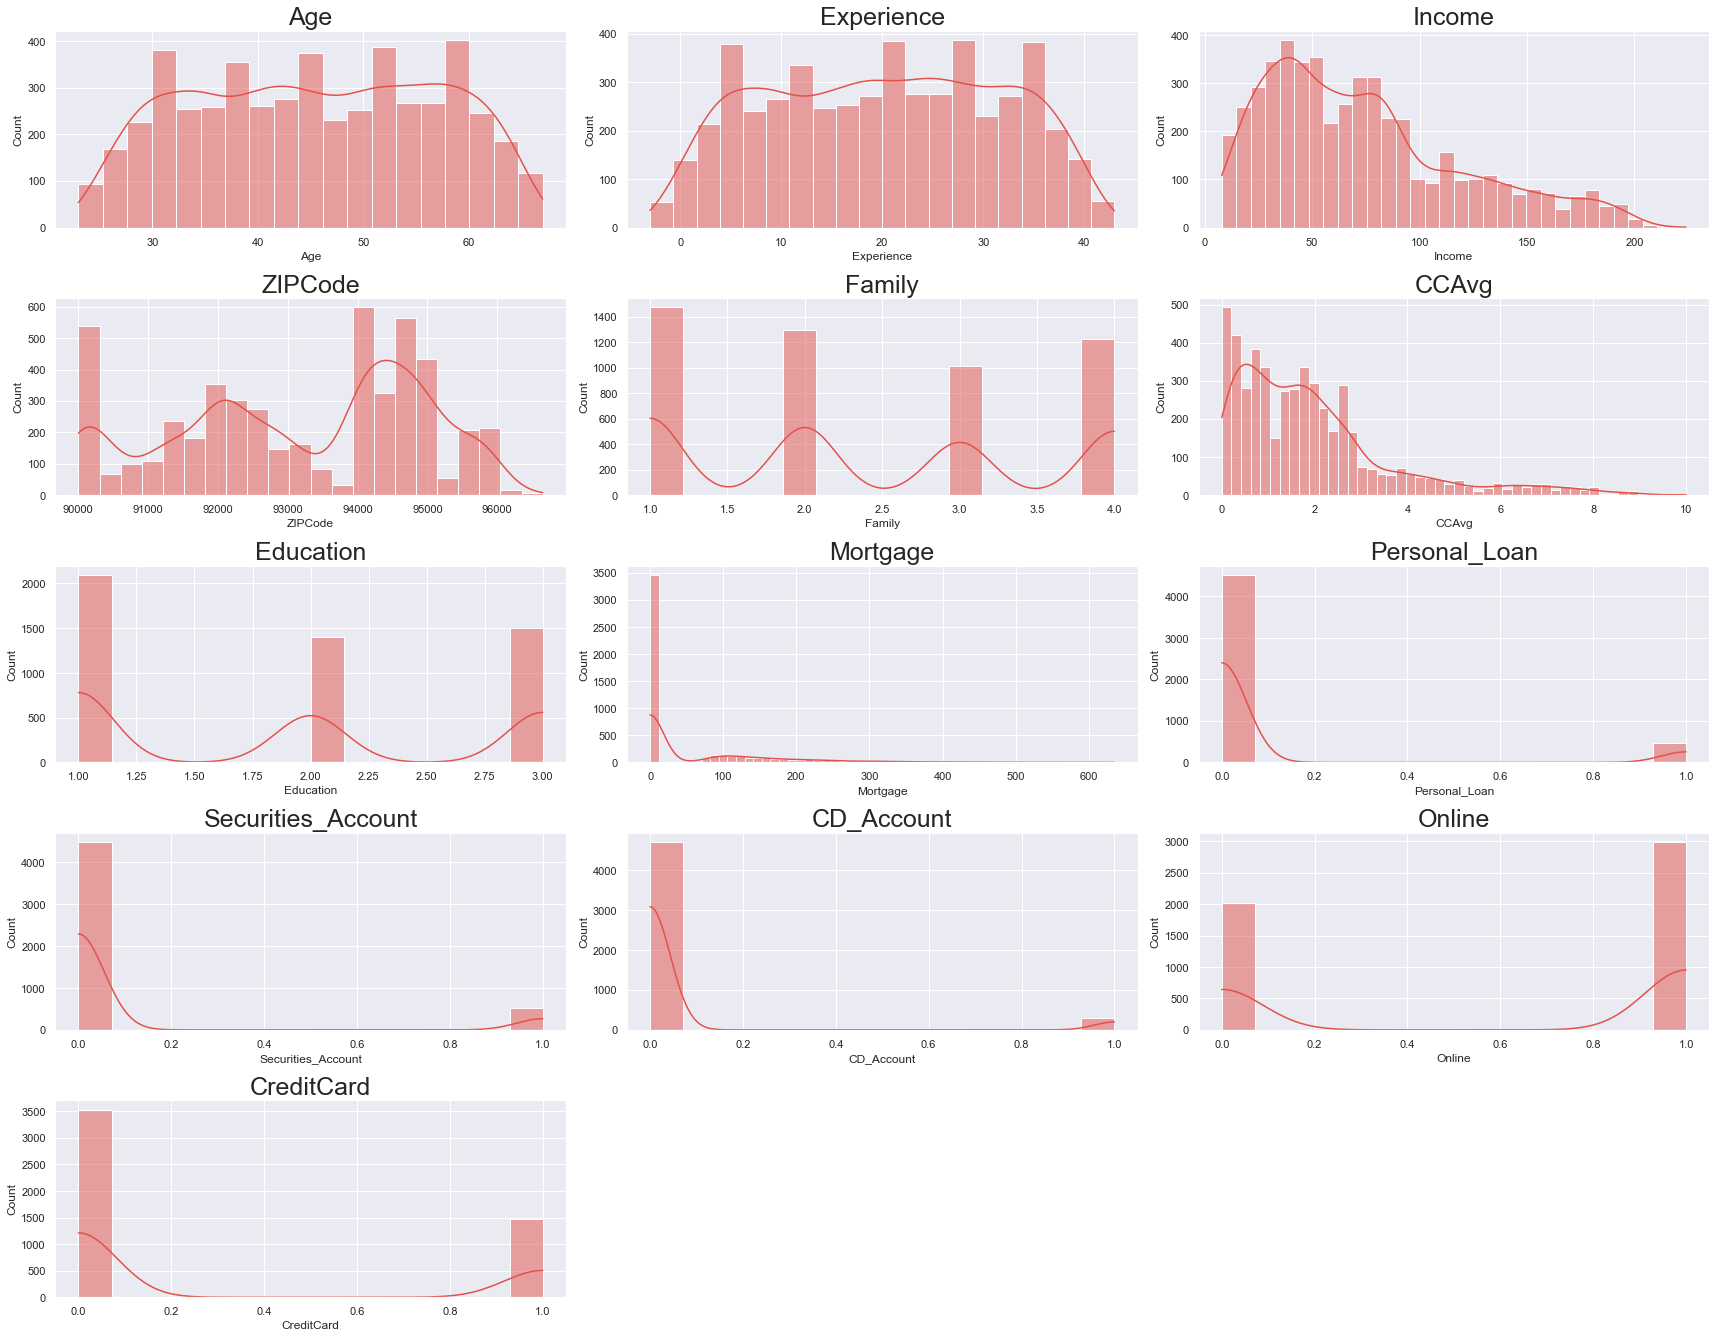

In [251]:
# Plot the distributions of the Numeric Variables
all_col = data.select_dtypes(include=np.number).columns.tolist()  # create a list of the numeric columns
all_col.remove("ID")                      # remove the ID from the numeric column list
plt.figure(figsize=(24, 48))

for i in range(len(all_col)):                # create a subplot for display of distributions
    plt.subplot(13, 3, i + 1)
    #plt.hist(cars[all_col[i]])               # without distribution (kde) curves
    sns.histplot(data[all_col[i]], kde=True)  # with distribution (kde) curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

**Observations:**
1. Age and Experience show normal distributions.
2. Income and CCAvg have right skewed distributions.
3. Zip Codes have a non-normal distribution.
4. The distribution of Family is not normal, but there is a good sample distribution. This is a categorical value and will be converted.
5. There are more Customers with a Education value of 1 (Undergrad). This is a categorical value and will be conveted.
6. Most Customers have a Mortgage value of 0.
7. Most Customers do no have a Personal loan, Securities Account, CD Account, or Credit Card at another Bank.
8. Most of the Customers have an Online/Internet Banking Account, but there is a significant percentage that does not.


### Closer look at Distributions

In [252]:
# Look at central tendency and dispersion with a function that 1. inputs numerical column and 2. outputs boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,           # Number of rows of the subplot grid=2
        sharex=True,       # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )                      # creating 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="lightgrey"
    )                      # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )                      # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )                      # Add the mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )                      # Add the median to the histogram

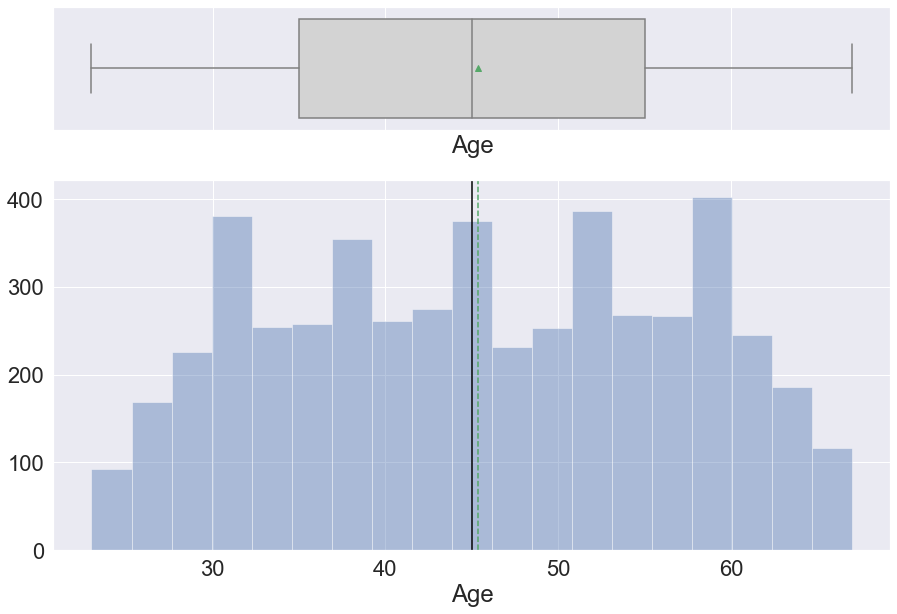

In [253]:
# Let's explore the independent variable - Age
histogram_boxplot(data.Age)

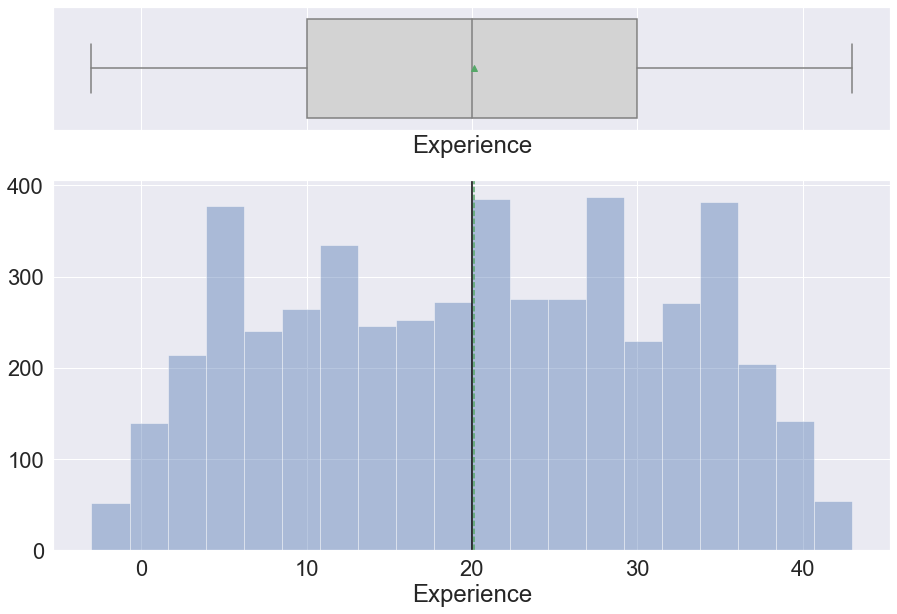

In [254]:
# Let's explore the independent variable - Experience
histogram_boxplot(data.Experience)

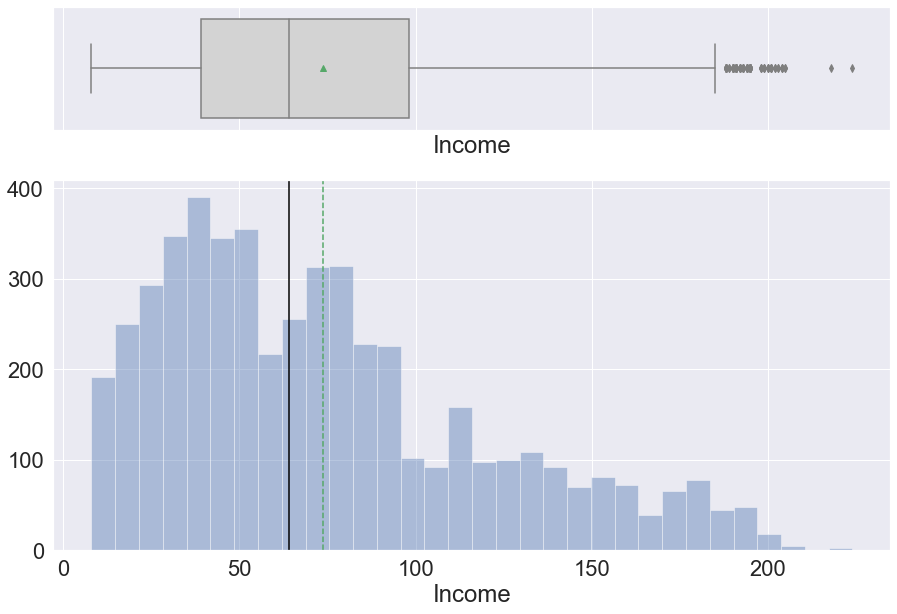

In [255]:
# Let's explore the independent variable - Income
histogram_boxplot(data.Income)

**Observation:**
- The Income has a right skew and outliers above the upper 3Q whisker.

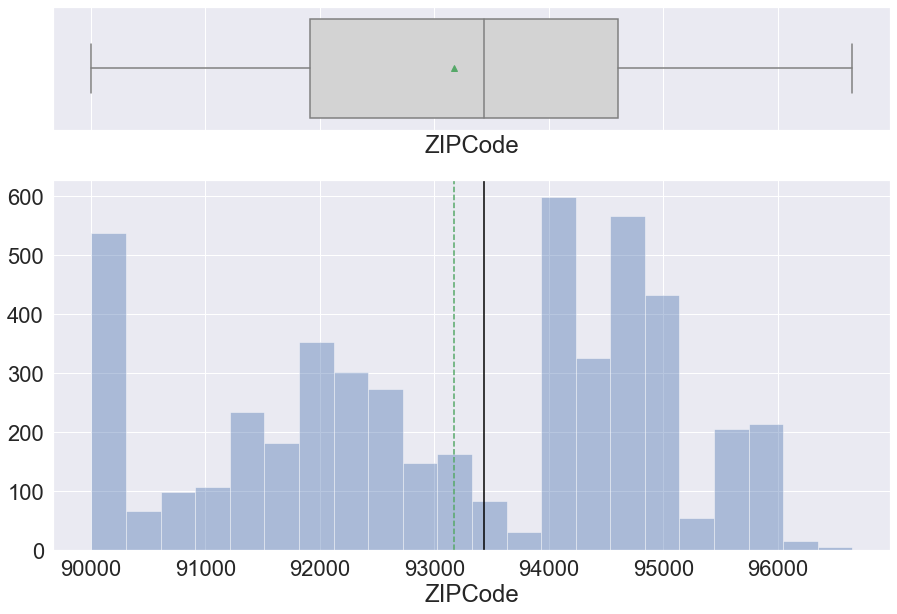

In [256]:
# Let's explore the independent variable - Zip Code
histogram_boxplot(data.ZIPCode)

**Observation:**
- The Zip Code has a non-uniform distribution. These are entered in as numeric values, but are more categorical. These will be converted to City. 

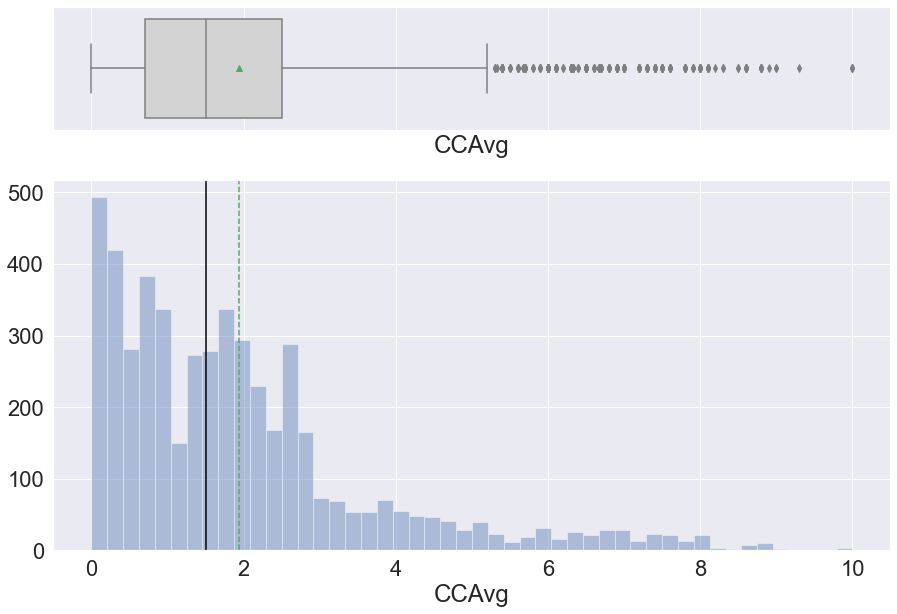

In [257]:
# Let's explore the independent variable - CC Average
histogram_boxplot(data.CCAvg)

**Observation:**
- The average montly credit card amount is right skewed and has outliers above the upper 3Q whisker.

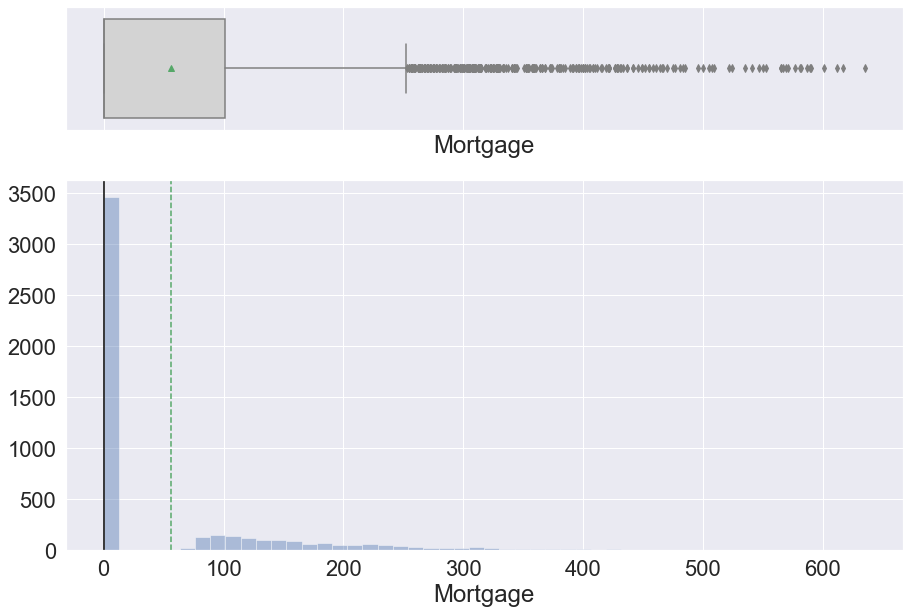

In [258]:
# Let's explore the independent variable - Mortgage
histogram_boxplot(data.Mortgage)

**Observation:**
- Most Customers have no mortgage. Therefore a Mortgage value of 0 is not outlier.
- The Mortgage is right skewed and there are outliers above the upper whisker.

### Convert Data Types

In [259]:
# Convert data types to Boolean

# data["Personal_Loan"] = data["Personal_Loan"].astype("bool")   # Convert the dependent variable
# data["Securities_Account"] = data["Securities_Account"].astype("bool")
# data["Online"] = data["Online"].astype("bool")
# data["CD_Account"] = data["CD_Account"].astype("bool")
# data["CreditCard"] = data["CreditCard"].astype("bool")

In [260]:
# Confirm datatypes
#data.info()

In [261]:
# Function to create barplots with the percentage labels.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05     # width of the plot
        y = p.get_y() + p.get_height()               # height of the plot
        ax.annotate(percentage, (x, y), size = 16)   # annotate the percentage 
    plt.show() # show the plot

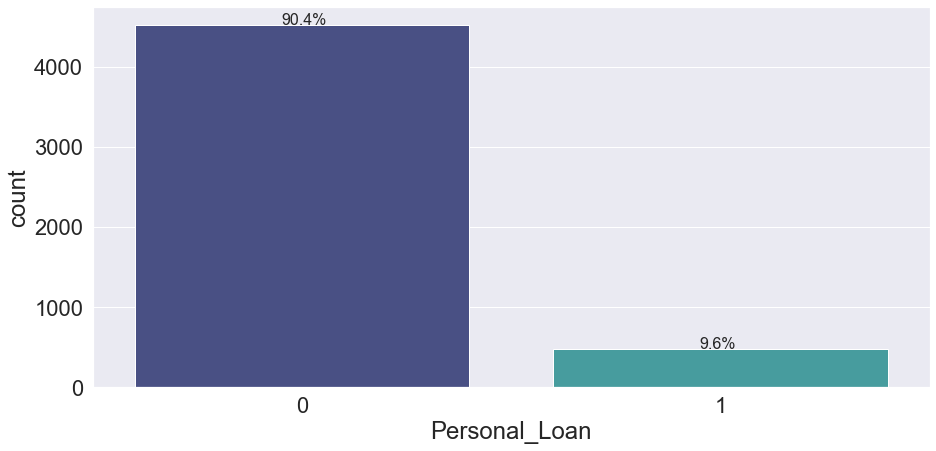

In [262]:
# Plot countplot for the dependent variable - Personal Loan
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Personal_Loan"],palette='mako')
perc_on_bar(ax,data["Personal_Loan"])

**Observation:**
- Only 9.6% of Customers have a Personal Loan.

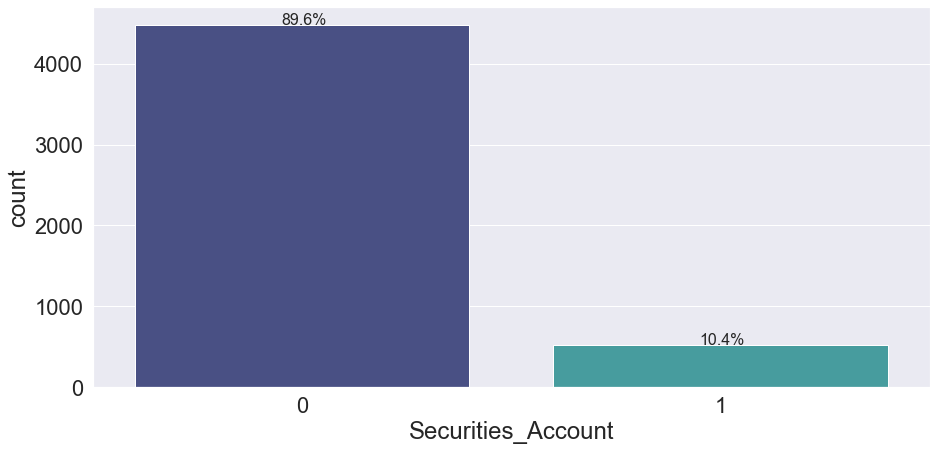

In [263]:
# Plot countplot for the independent variable - Securities Account
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Securities_Account"],palette='mako')
perc_on_bar(ax,data["Securities_Account"])

**Observation:**
- Only 10.4% of Customers have a Securities Account.

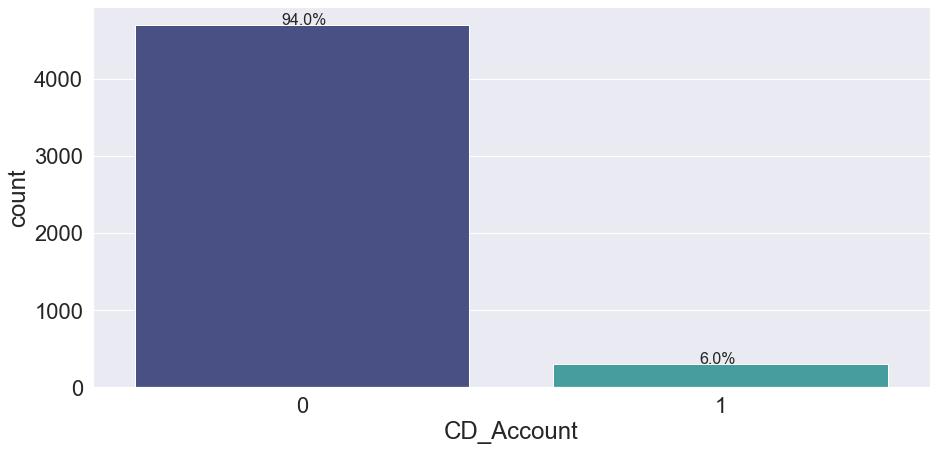

In [264]:
# Plot countplot for the independent variable - CD Account
plt.figure(figsize=(15,7))
ax = sns.countplot(data["CD_Account"],palette='mako')
perc_on_bar(ax,data["CD_Account"])

**Observation:**
- Only 6.0% of Customers have a CD Account.

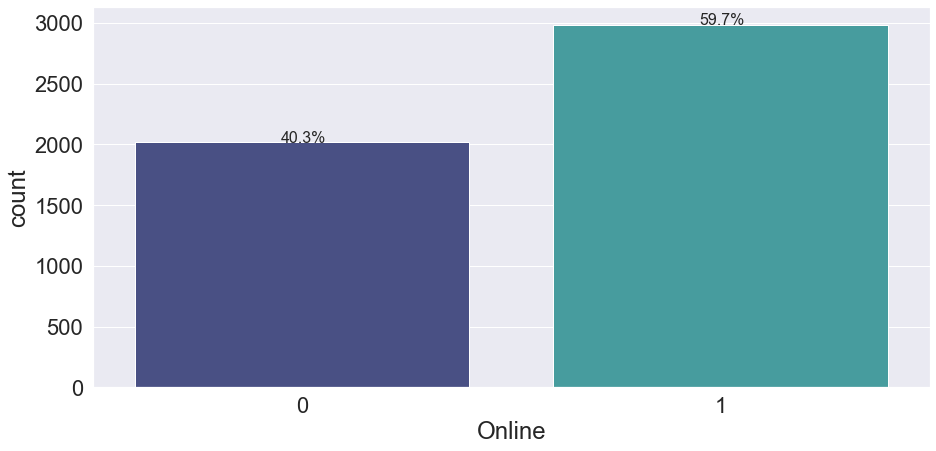

In [265]:
# Plot countplot for the independent variable - Online
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Online"],palette='mako')
perc_on_bar(ax,data["Online"])

**Observation:**
- 59.7% of Customers use Online Banking accounts.
- 40.3% of Customers do not use Online Banking.

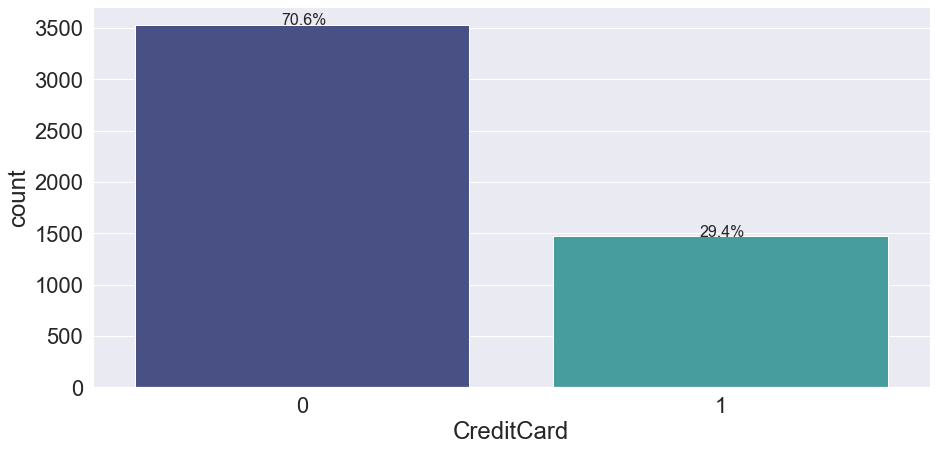

In [266]:
# Plot countplot for the independent variable - Credit Card
plt.figure(figsize=(15,7))
ax = sns.countplot(data["CreditCard"],palette='mako')
perc_on_bar(ax,data["CreditCard"])

**Observations:**
- 29.4% of Customers have a credit card with another Bank.
- It is not clear what if any of the 70.6% remaining Customers have a Crdit Card with AllLife Bank.

Next let's look at the relationship of the variables.

### Bivariate Analysis

#### Heatmap

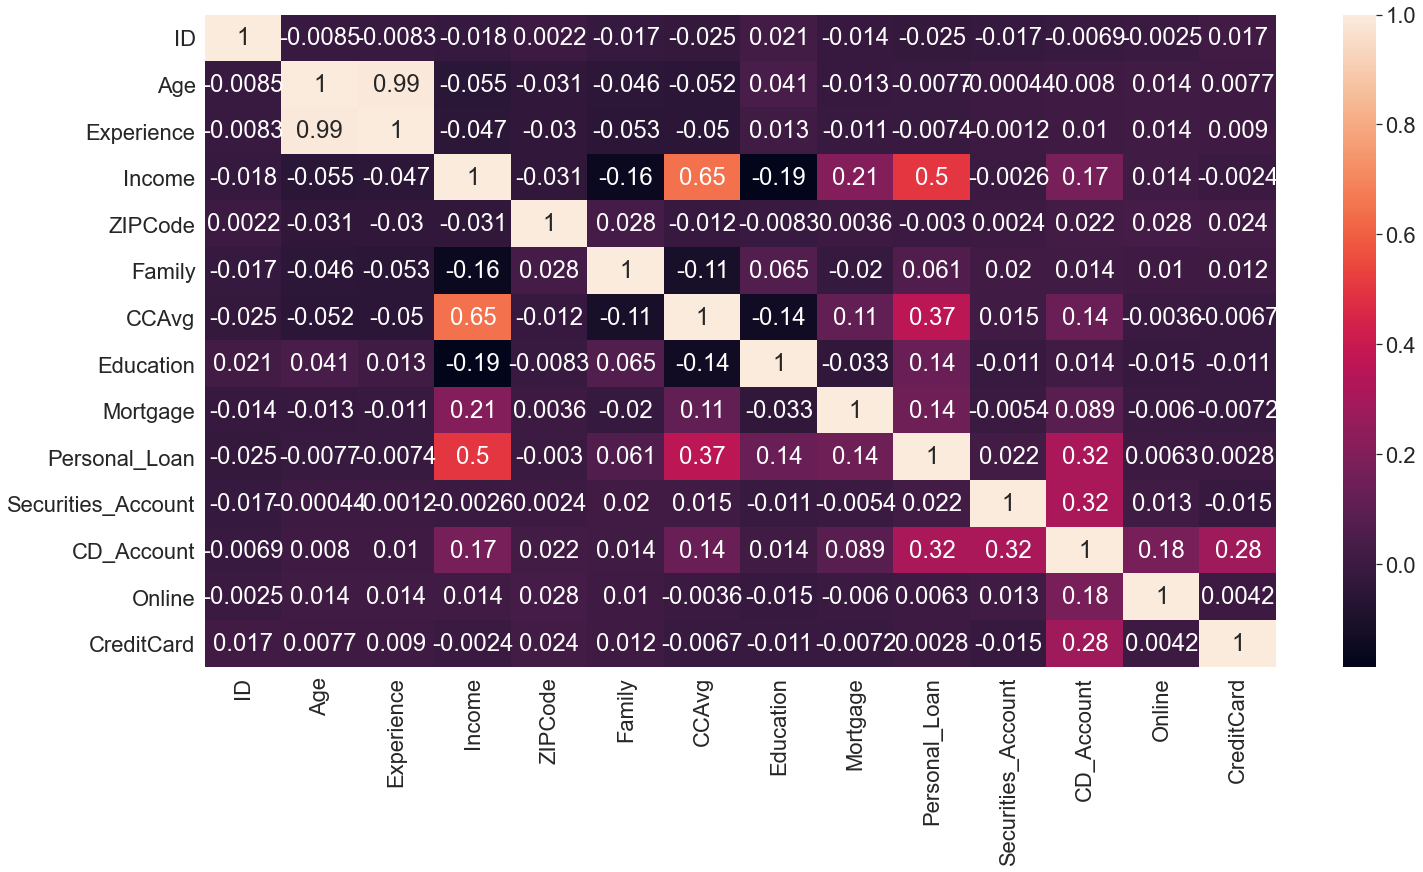

In [267]:
# Display heatmap of the data correlations

plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Observations:**
- There is a very high correlation (0.99) between Age and Experience. This is expected.
- There is a moderate correlation (0.65) between Income and Average monthly credit card amount.
- There is a modest correlation (0.5) between Income and Personal_Loan.
- There is a modest positive correlation between Personal loan and Average monthly credit card amount (0.37), and Personal Loan and CD Account (0.32).
- There is a no corrleation between Personal_Loan and Age, Experience, Zip code, Family, Education, Mortgage, Securities Account, Online and Credit Card.


#### Pairplot

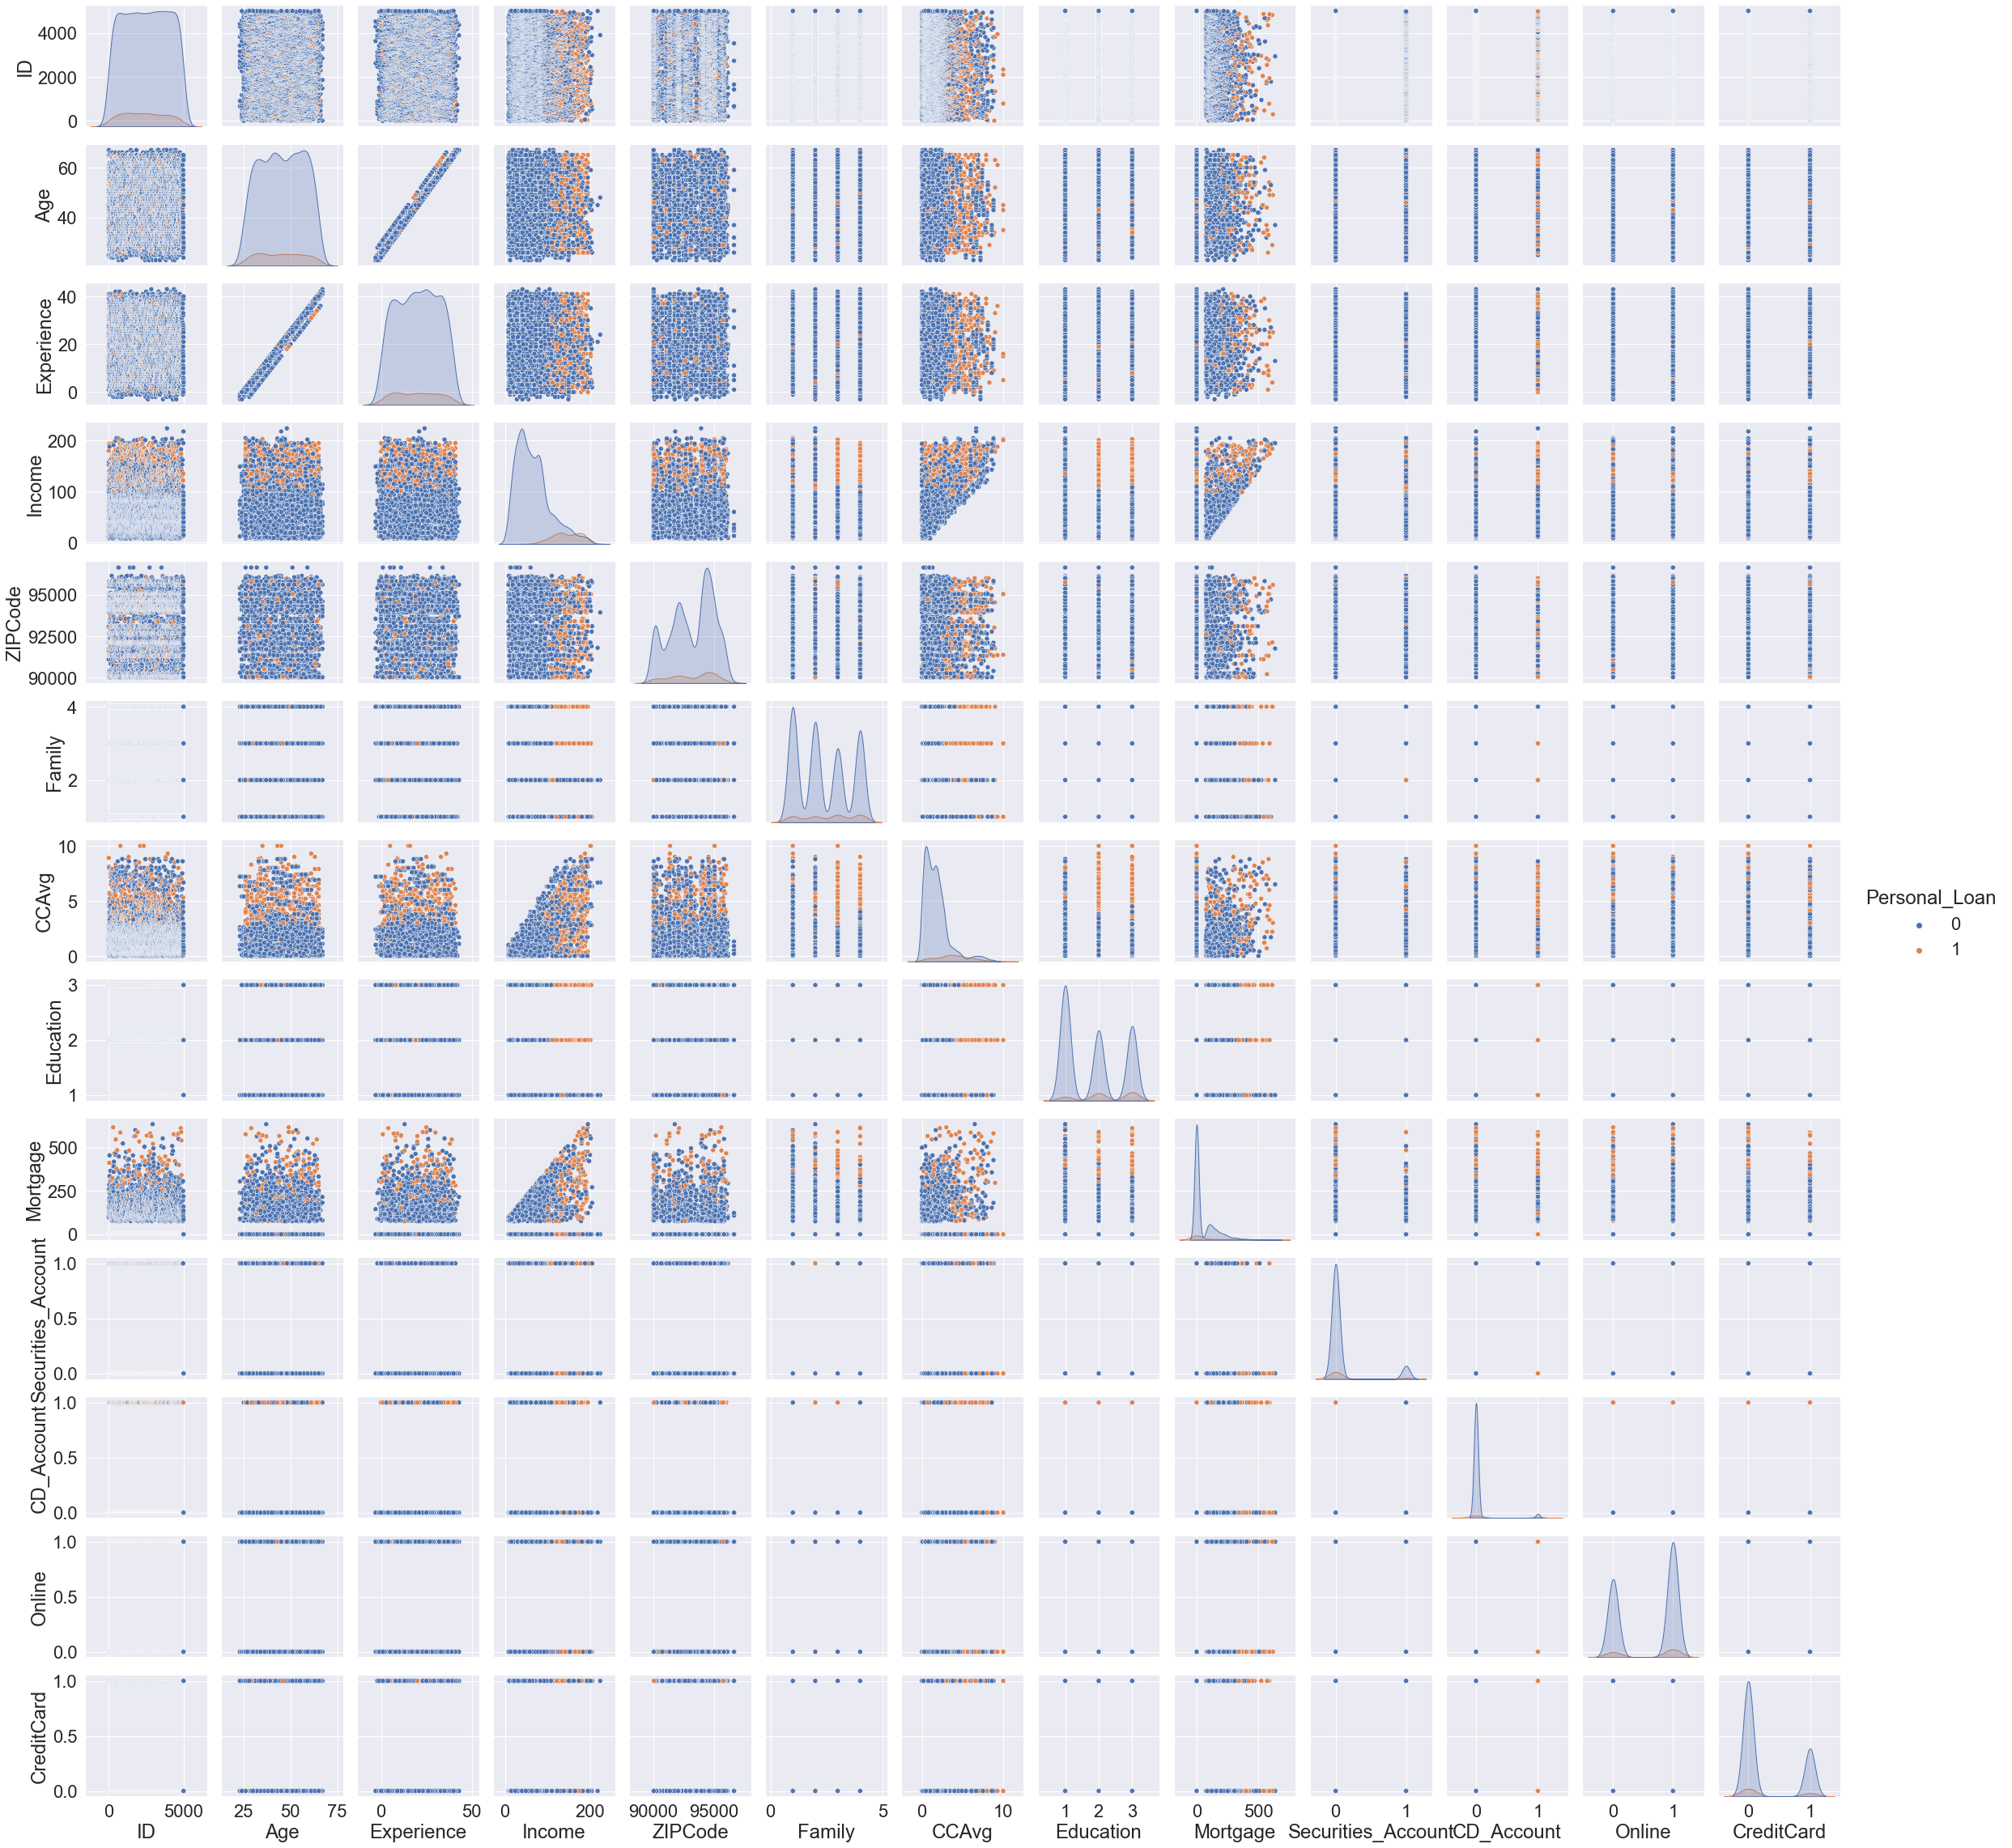

In [268]:
# Create pairplot to analyze patterns
sns.pairplot(data=data, hue="Personal_Loan",)
plt.show()

**Observations:**
- The strongest correlation/pattern is between Age and Experience (linear).
- There appears to be a correlation between Customers having a Personal Loan or not in the correlation plots for Income vs.  Age, Experience and Zip Code. The higher Income Customers are more likely to have Personal Loans.


Next, look at the relationship between these continuous variables and the dependent variable.

#### Boxplots

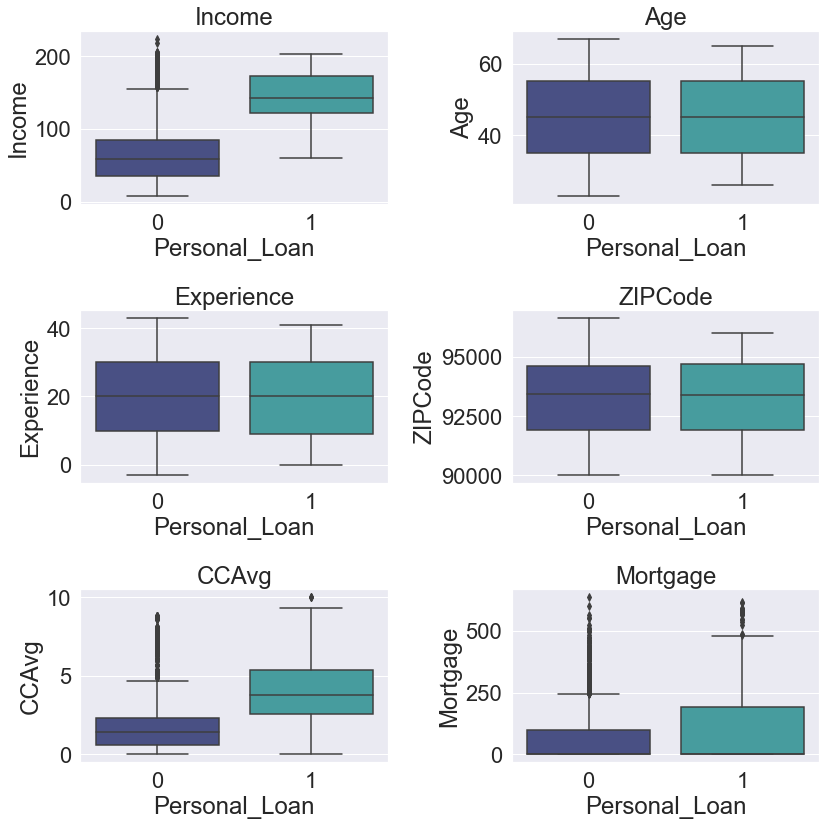

In [269]:
# Create Box plots of the Personal Loan vs Income, Age, Experience, Zip Code, CCAvg, adn Mortgage
# Include outliers

cols = data[['Income','Age', 'Experience', 'ZIPCode', 'CCAvg', 'Mortgage']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="mako")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
- There are upper outliers in Income, CCAbg, and Mortgage. These will not be treated since Decision Trees are not influenced by outliers.
- There are no lower outliers.
- Personal Loan Customers have higher Incomes than Customers without Personal Loans.
- Customers with and without Personal Loans have the same range in Age, Experience, and Zip Code.
- Customers with Personal Loans have higher average monthly credit card charges.
- Customers with Personal Loans have highe Mortgage values.

Next let's look at the discrete variables vs Personal Loan.

#### Barplots

In [270]:
# Generate stacked bar plots for the variables

def stacked_plot(x):
    sns.set(palette='Spectral')
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


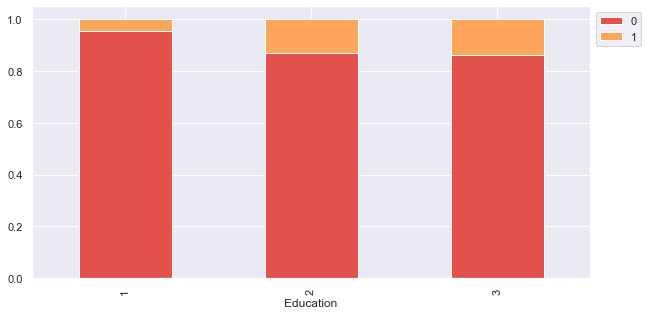

In [271]:
# Create a stacked bar plot for Education
stacked_plot(data['Education'])

**Observation:**
- There are more Customers with an Undergraduate Education than a Graduate Education or Professional/Advanced Education.
- There is a lower percentage of Personal loans for Customers with Undergraduate Education.
- There is a similare percentage of Personal loans for Customers with Graduate and Professional/Advanced Education.

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


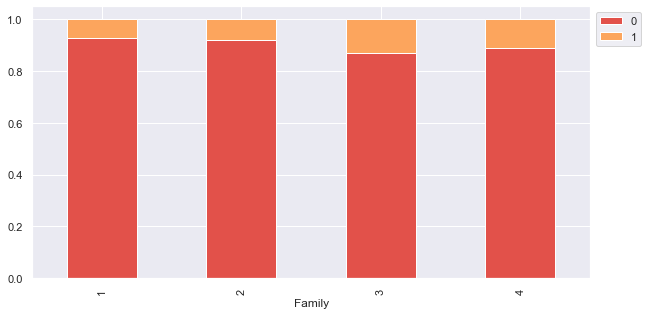

In [272]:
# Create a stacked bar plot for Family
stacked_plot(data['Family'])

**Observations:**
- There are more Customers with a Family size of 1 or 2 than size of 3 or 4.
- Customers with a Family size of 1 & 2 have similar percentages of Personal Loans.
- Customers with a Family size of 3 & 4 have similar percentages of Personal Loans.
- There are fewest Customer Family size is 3.

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


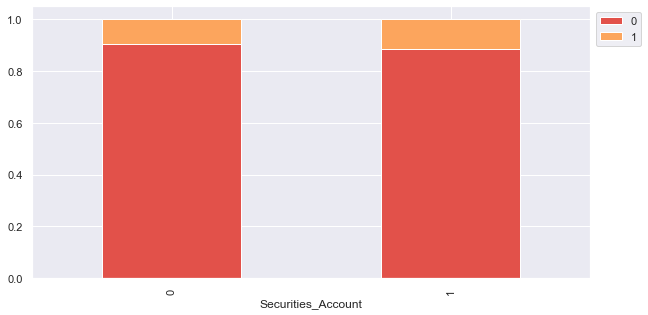

In [273]:
# Create a stacked bar plot for Securities Account
stacked_plot(data['Securities_Account'])

**Observations:**
- The majority of Customers without a Securities Account do not have a Personal Loan.
- The number of Customers without a Securities Account who do have a Personal loan is similar to the number of Customers with a Securities Account who do not have a Personal Loan.
- Only 60 Customers have both a Securities Account and a Personal Loan.

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


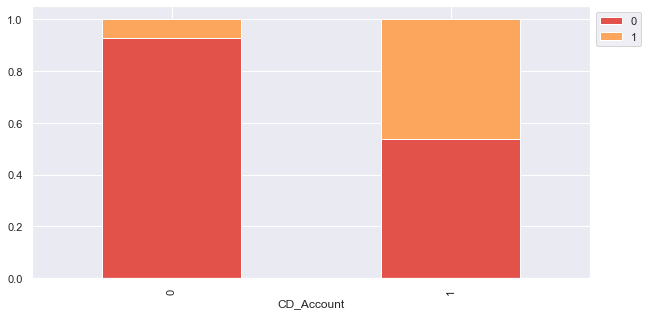

In [274]:
# Create a stacked bar plot for CD Account
stacked_plot(data['CD_Account'])

**Observations:**
- The majority of Customers without a CD Account do not have a Personal Loan.
- The number of Customers with a CD Account who do have a Personal loan is similar to the number of Customers with a  CD Account who do not have a Personal Loan.
- Only 140 Customers have both a CD Account and a Personal Loan. 
- If Customers have a CD account, the likelihood of them having a Personal Loan increases.

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


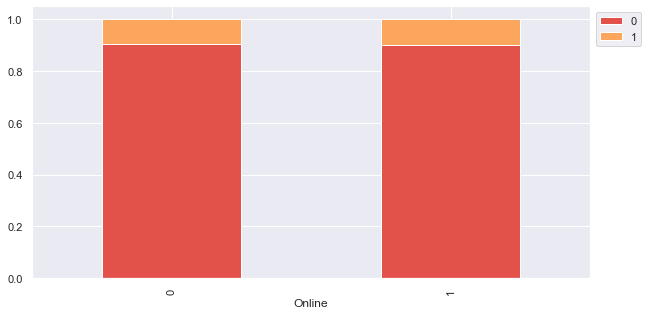

In [275]:
# Create a stacked bar plot for Online
stacked_plot(data['Online'])

**Observations:**
- There ae more Customers with an Online Banking Account who do not have a Personal Loan.
- The proportion of Customers with an Online Banking Account who do have a Personal loan is similar to the proportion of Customers without an Online Banking Account who have a Personal Loan.
- Only 291 Customers have both a Online Banking Account and a Personal Loan. 

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


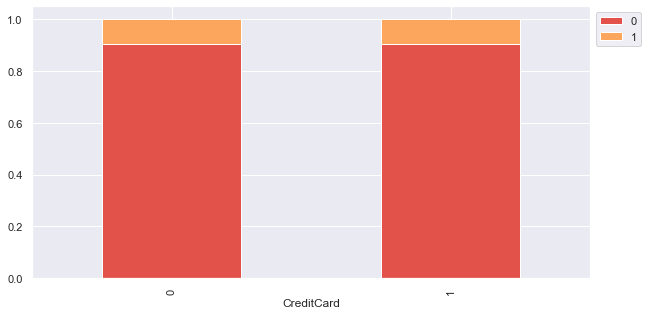

In [276]:
# Create a stacked bar plot for Credit Card
stacked_plot(data['CreditCard'])

**Observations:**
- The majority of Customers without a Credit Card do not have a Personal Loan.
- The proportion of Customers without a Credit Card who do have a Personal loan is similar to the proportion of Customers with Credit Card who do have a Personal Loan.
- Only 143 Customers have both a Credit Card and a Personal Loan. 

In [277]:
loan_data = data[data['Personal_Loan']==True]  # Look at Personal_Loan customers only
len(loan_data)

480

In [278]:
loan_data.groupby(['Education','Family'])['Personal_Loan'].count()

Education  Family
1          1          9
           2          4
           3         40
           4         40
2          1         40
           2         50
           3         44
           4         48
3          1         58
           2         52
           3         49
           4         46
Name: Personal_Loan, dtype: int64

**Observations:**
- Only 480 Customers have Personal Loans.
- Customers with an Undergraduate Education and 1 or 2 Family size have significantly fewer Personal Loans than the Higher Education and larger family sizes.

#### Key Observations -
- CD Account is a strong indicator of Customers taking a Personal Loan.
- Family Size and Education can also be factors for Customers taking a Personal Loan or Not. Smaller Family sizes with Lower Education have significantly fewer Loans.
- Other factors do not appear to be good indicators of taking the Personal Loan. Chi-square tests can be used to determine statistical significance in the association between two categorical variables.

In [279]:
# Generate stacked bar plots for the variables

def stacked_plot_CDAcc(x):
    sns.set(palette='Spectral')
    tab1 = pd.crosstab(x,data['CD_Account'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['CD_Account'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

CD_Account        0    1   All
Personal_Loan                 
0              4358  162  4520
1               340  140   480
All            4698  302  5000
------------------------------------------------------------------------------------------------------------------------


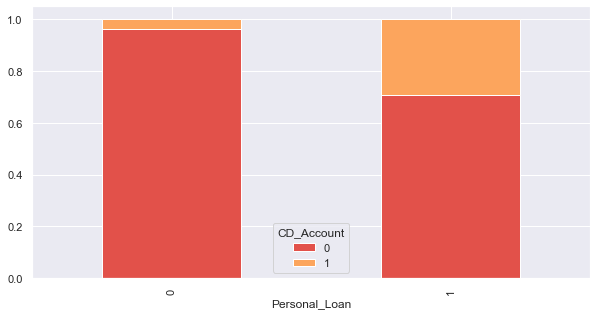

In [280]:
stacked_plot_CDAcc(data['Personal_Loan'])

CD_Account             0    1   All
Securities_Account                 
0                   4323  155  4478
1                    375  147   522
All                 4698  302  5000
------------------------------------------------------------------------------------------------------------------------


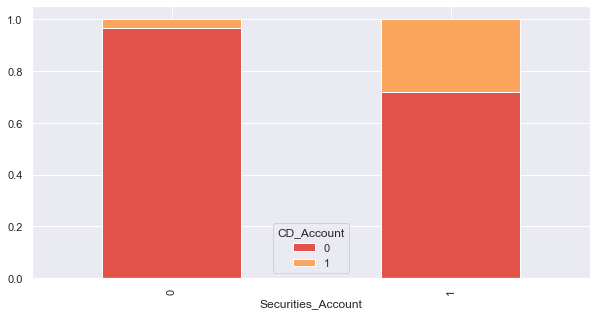

In [281]:
stacked_plot_CDAcc(data['Securities_Account'])

CD_Account     0    1   All
Online                     
0           1997   19  2016
1           2701  283  2984
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


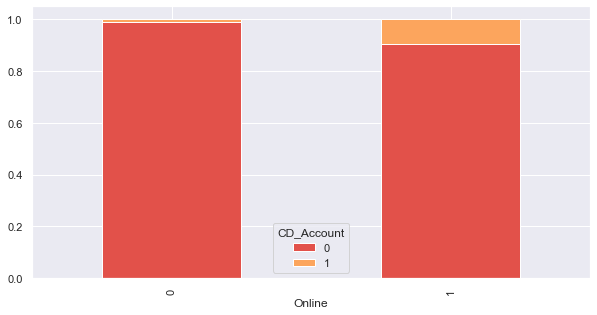

In [282]:
stacked_plot_CDAcc(data['Online'])

CD_Account     0    1   All
CreditCard                 
0           3468   62  3530
1           1230  240  1470
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


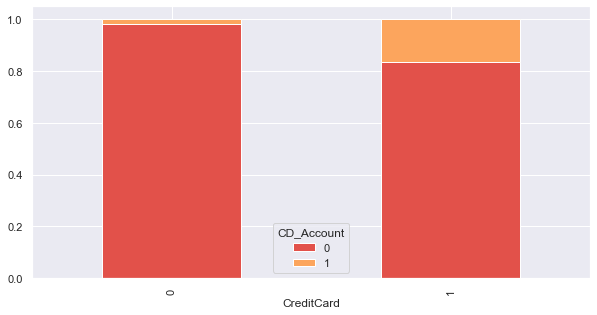

In [283]:
stacked_plot_CDAcc(data['CreditCard'])

CD_Account     0    1   All
Family                     
1           1389   83  1472
2           1229   67  1296
3            928   82  1010
4           1152   70  1222
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


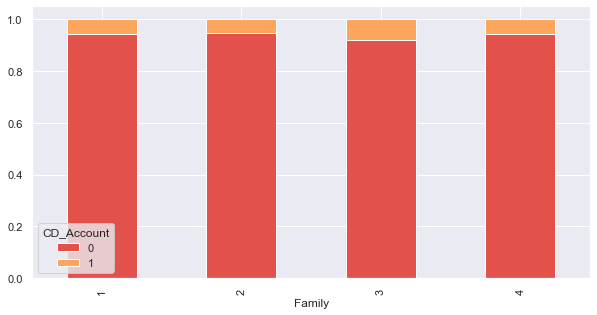

In [284]:
stacked_plot_CDAcc(data['Family'])

CD_Account     0    1   All
Education                  
1           1978  118  2096
2           1315   88  1403
3           1405   96  1501
All         4698  302  5000
------------------------------------------------------------------------------------------------------------------------


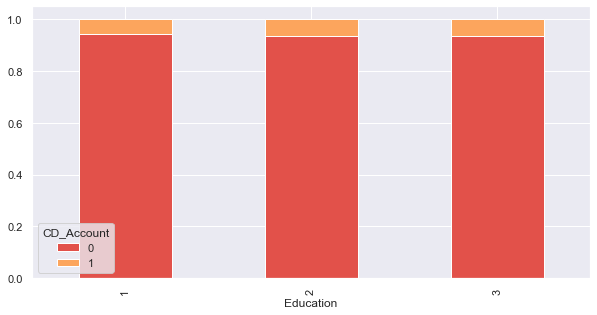

In [285]:
stacked_plot_CDAcc(data['Education'])

**Observations:**
- Customers with a Securities Account or Credit Card are more likely to have a CD Account.
- Customers with an Online Banking Account are slightly more likely to have a CD Account.
- Customers with a Family size of 3 are more likely to have a CD Account. This is interesting since a Family size of 3 is the smallest group in this sample.
- Education does not appear to have an affect on a Customer having a CD Account.

Are these statistically significant? Test with Chi-Square Tests for Categorical variables.

### Chi-Square
This is a statistical method to determine if two categorical variables have a significant correlation between them.
  
$H_0$ - Null Hypothesis - There is no association between the two variables.      
$H_a$ - Alternate Hypothesis - There is an association between two variables.


In [286]:
crosstab = pd.crosstab(data['CD_Account'],data['Securities_Account'])  # Contingency table of attributes

Ho = "CD Account has no effect on Securities Account"   # Stating the Null Hypothesis
Ha = "CD Account has an effect on Securities Account"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD Account has an effect on Securities Account as the p_value (0.0) < 0.05


In [287]:
crosstab = pd.crosstab(data['CD_Account'],data['CreditCard'])  # Contingency table of attributes

Ho = "CD Account has no effect on Credit Card"   # Stating the Null Hypothesis
Ha = "CD Account has an effect on Credit Card"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD Account has an effect on Credit Card as the p_value (0.0) < 0.05


In [288]:
crosstab = pd.crosstab(data['CD_Account'],data['Online'])  # Contingency table of attributes

Ho = "CD Account has no effect on Online Account"   # Stating the Null Hypothesis
Ha = "CD Account has an effect on Online Account"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD Account has an effect on Online Account as the p_value (0.0) < 0.05


In [289]:
crosstab = pd.crosstab(data['CD_Account'],data['Family'])  # Contingency table of attributes

Ho = "CD Account has no effect on Family"   # Stating the Null Hypothesis
Ha = "CD Account has an effect on Family"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD Account has an effect on Family as the p_value (0.018) < 0.05


In [290]:
crosstab = pd.crosstab(data['CD_Account'],data['Education'])  # Contingency table of attributes

Ho = "CD Account has no effect on Education"   # Stating the Null Hypothesis
Ha = "CD Account has an effect on Education"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

CD Account has no effect on Education as the p_value (0.58) > 0.05


#### Key Observations-
- P-value for four of the tests < 0.05, and are statistically significant.
- There is a correlation between CD Account and Securities Account. People who have Securities accounts are more likely to have CD Accounts.
- There is a correlation between CD Account and Credit Card. People who have Credit Cards are more likely to have CD Accounts.
- There is a correlation between CD Account and Online Banking Accounts. People who have Online Banking Accountss are more likely to have CD Accounts.
- There is a correlation between CD Account and Family Size. People who have larger families are more likely to have CD Accounts.
There is no correlation between CD Account and Education. This is interesting.

## Feature Enginerring

Drop un-necessary features, and convert Zip Codes.

#### Drop un-necessary features

The ID column is a unique number or identifier and will not be of any use in the decision tree.

In [291]:
# Drop the ID column. This variable is not informative for decision trees.
data.drop(['ID'], axis=1, inplace=True)

In [292]:
# Confirm column has been dropped
data.head(2)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0

#### Convert Zip Codes to Cities

The Zip codes are entered as numeric, but are characteristic. These will be converted to Cities and re-assigned as categorical.

In [293]:
# Install uszipcode - run this once
# pip install uszipcode

In [294]:
# Convert Zip Codes to Cities, County, and State

# Import library
from uszipcode import SearchEngine

In [295]:
# Initiate Search Engine
search = SearchEngine()  

In [296]:
# Define a function to convert Zip Codes to the Major City Name

def zcode_city(x):
    zipcode =  search.by_zipcode(x)
    city = zipcode.major_city
    return city if city else x  # Return the City if it is defined, else return the original value

data['City'] = data['ZIPCode'].apply(zcode_city)

In [297]:
# Define a function to convert Zip Codes to the Major City Name

def zcode_county(x):
    zipcode =  search.by_zipcode(x)
    county = zipcode.county
    return county if county else x  # Return the County if it is defined, else return the original value

data['County'] = data['ZIPCode'].apply(zcode_county)

In [298]:
# Define a function to convert Zip Codes to the Major City Name

def zcode_state(x):
    zipcode =  search.by_zipcode(x)
    state = zipcode.state
    return state if state else x  # Return the State if it is defined, else return the original value

data['State'] = data['ZIPCode'].apply(zcode_state)

In [299]:
# Confirm the new column is City
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City                County State  
0       Pasadena    Los Angeles County    CA  
1    Los Angeles    Los Angeles County    CA  
2       Berkeley        Alameda County    CA  
3  San Francisco  San Francisco County    CA  
4     Northridge    Los Angeles County    CA

In [300]:
# How many unique values are there for each City?
data['City'].nunique()

248

In [301]:
# How many unique values are there for each County?
data['County'].nunique()

42

In [302]:
# How many unique values are there for each State?
data['State'].nunique()

5

**Observation:**
- The 467 zip codes have been reduced to 248 cities.
- The 467 zip codes have been reduced to 42 counties.
- The 467 zip codes have been reduced to 5 states.

In [303]:
# What are these 5 states?
data['State'].unique()

array(['CA', 92717, 93077, 92634, 96651], dtype=object)

In [304]:
# What are these Counties?
data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', 92717,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County', 93077,
       'Mendocino County', 92634, 'San Joaquin County', 96651,
       'Imperial County', 'Siskiyou County', 'Merced County',
       'Trinity County', 'Stanislaus County', 'Shasta County',
       'Tuolumne County', 'Napa County', 'Lake County'], dtype=object)

In [305]:
data[data['ZIPCode'] == 92717]['Personal_Loan'].value_counts()

0    19
1     3
Name: Personal_Loan, dtype: int64

In [306]:
data[data['ZIPCode'] == 93077]['Personal_Loan'].value_counts()

0    1
Name: Personal_Loan, dtype: int64

In [307]:
data[data['ZIPCode'] == 92634]['Personal_Loan'].value_counts()

0    5
Name: Personal_Loan, dtype: int64

In [308]:
data[data['ZIPCode'] == 96651]['Personal_Loan'].value_counts()

0    6
Name: Personal_Loan, dtype: int64

**Observation:**
- There are four Zip codes that aren't assigned to any City, County, or State. A quick search in  https://www.unitedstateszipcodes.org/ confirms that these are not defined Zip Codes. These will be re-assigned as unknown.
- Since there is only 1 state (California) and the unknown state, the State Column will be dropped.
- The unknown City and County values will be re-assigned.

In [309]:
# Define a function to convert Zip Codes to the Major City Name

def zcode_city(x):
    zipcode =  search.by_zipcode(x)
    city = zipcode.major_city
    return city if city else None  # Return the City if it is defined, else return None value

data['City'] = data['ZIPCode'].apply(zcode_city)

In [310]:
# How many unique values are there for each City?
data['City'].nunique()

244

In [311]:
# Define a function to convert Zip Codes to the Major City Name

def zcode_county(x):
    zipcode =  search.by_zipcode(x)
    county = zipcode.county
    return county if county else None  # Return the County if it is defined, else return the original value

data['County'] = data['ZIPCode'].apply(zcode_county)

In [312]:
# What are these Counties?
data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', None,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [313]:
data.drop(['State'], axis=1, inplace=True)
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City                County  
0       Pasadena    Los Angeles County  
1    Los Angeles    Los Angeles County  
2       Berkeley        Alameda County  
3  San Francisco  San Francisco County  
4     Northridge    Los Angeles County

#### Drop Zip Code ??????

In [316]:
# Drop the Zip Code column. This variable is now duplicate information.
data.drop(['ZIPCode'], axis=1, inplace=True)

data.head(2)    # Confirm that this has been dropped from the dataframe

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities_Account  CD_Account  Online  CreditCard         City  \
0                   1           0       0           0     Pasadena   
1                   1           0       0           0  Los Angeles   

               County  
0  Los Angeles County  
1  Los Angeles County

#### Re-assign and Confirm data types

In [317]:
# Confirm data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  City                4966 non-null   object 
 13  County              4966 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 507.9+ KB


#### 

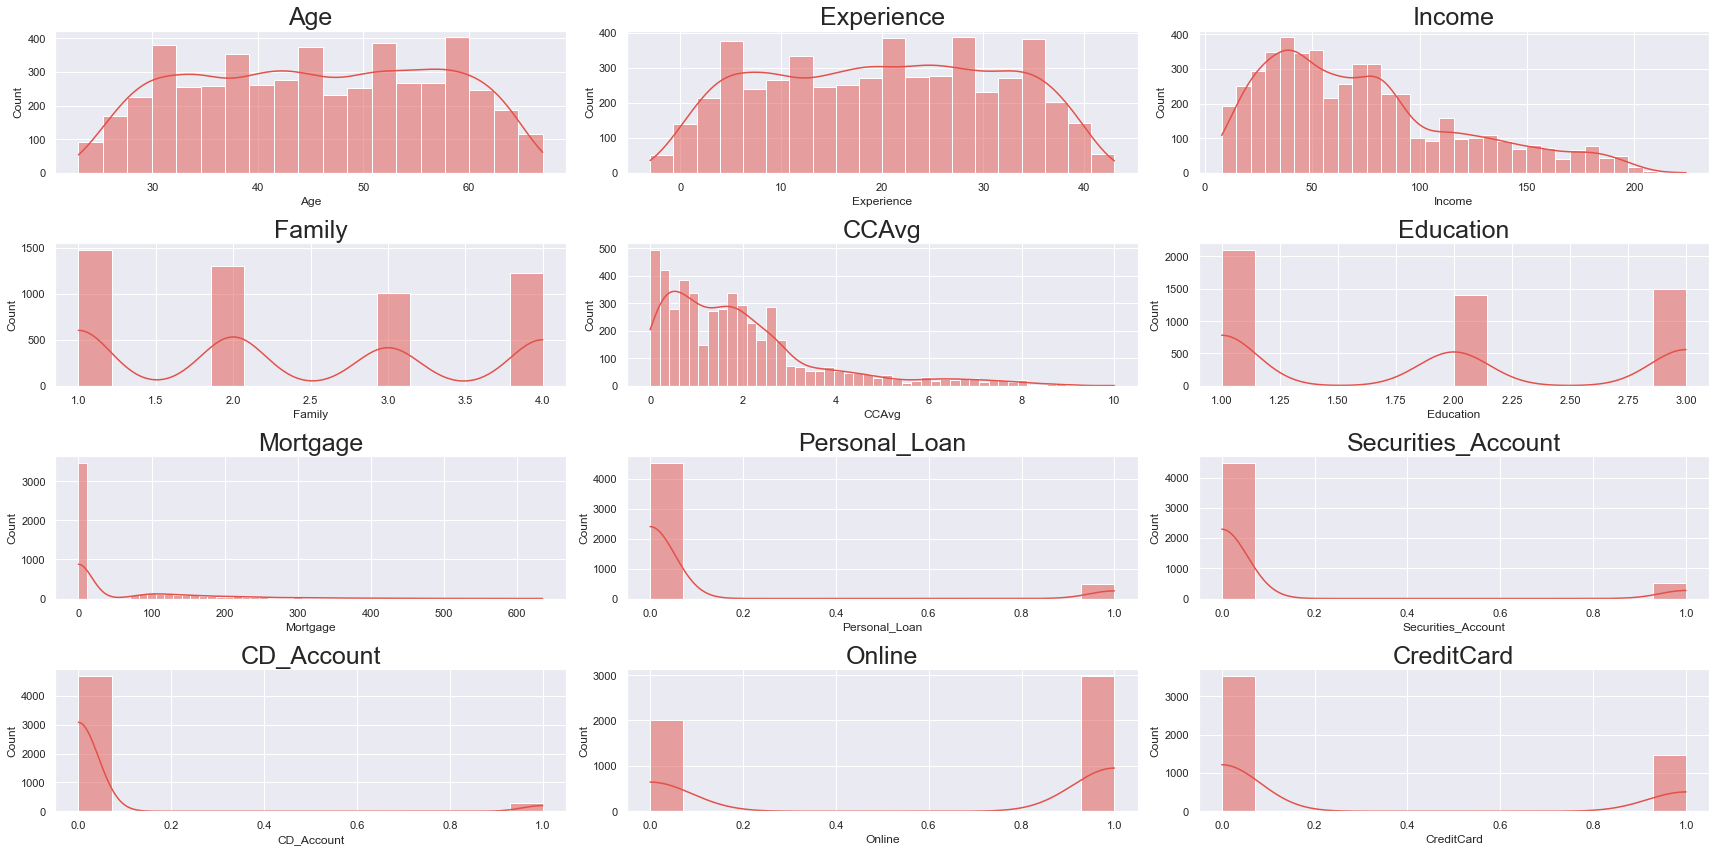

In [318]:
# QC the distribution plots

all_col2 = data.select_dtypes(include=np.number).columns.tolist()  # create a list of the numeric columns

plt.figure(figsize=(24, 12))

for i in range(len(all_col2)):                # create a subplot for display of distributions
    plt.subplot(4, 3, i + 1)
    #plt.hist(cars[all_col[i]])               # without distribution (kde) curves
    sns.histplot(data[all_col2[i]], kde=True)  # with distribution (kde) curves
    plt.tight_layout()
    plt.title(all_col2[i], fontsize=25)

plt.show()

In [ ]:
# Let's confirm an independent variable - Mortgage
#histogram_boxplot(clean_df.Mortgage)

We will look into some of the values where Mortgage = 0.

In [ ]:
# Let's confirm an independent variable - CCAvg
#histogram_boxplot(clean_df.CCAvg)

There is a huge spike at CCAvg = 5. We will look into this.

#### One Hot Encoding
Personal_Loan, Securities_Account, CD_Account, Online, and Credit card.

In [337]:
# Let's make a copy of the data before starting the dummy variables
clean_data = data.copy()

In [338]:
# Columns here do not need to keep order/ranking
oneHotCols = ["Securities_Account","CD_Account","Online", "CreditCard", "County"] 

In [339]:
clean_data = pd.get_dummies(clean_data, columns = oneHotCols, drop_first=True)

In [340]:
clean_data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

            City  Securities_Account_1  ...  County_Santa Cruz County  \
0       Pasadena                     1  ...                         0   
1    Los Angeles                     1  ...                         0   
2       Berkeley                     0  ...                         0   
3  San Francisco                     0  ...                         0   
4     Northridge                     0  ...                         0   

   County_Shasta County  County_Siskiyou County  County_Solano County  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   County_Sonoma County  County_Stanislaus County  County_Trinity County  \
0                     0                         0                      0   
1                     0                         0                      0   
2                     0                         0                      0   
3                     0                         0                      0   
4                     0                         0                      0   

   County_Tuolumne County  County_Ventura County  County_Yolo County  
0                       0                      0                   0  
1                       0                      0                   0  
2                       0                      0                   0  
3                       0                      0                   0  
4                       0                      0                   0  

[5 rows x 50 columns]

In [341]:
# Confirm data types
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Experience                     5000 non-null   int64  
 2   Income                         5000 non-null   int64  
 3   Family                         5000 non-null   int64  
 4   CCAvg                          5000 non-null   float64
 5   Education                      5000 non-null   int64  
 6   Mortgage                       5000 non-null   int64  
 7   Personal_Loan                  5000 non-null   int64  
 8   City                           4966 non-null   object 
 9   Securities_Account_1           5000 non-null   uint8  
 10  CD_Account_1                   5000 non-null   uint8  
 11  Online_1                       5000 non-null   uint8  
 12  CreditCard_1                   5000 non-null   u

All of the variables are numeric type, except City. There are two many unique City value to convert to dummy variables. This Location information is a duplicate of County, so it will not be included in the Training and Test data.

In [342]:
prep_data = clean_data.copy()
prep_data.drop(['City'], axis=1, inplace=True)
prep_data.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities_Account_1  CD_Account_1  ...  County_Santa Cruz County  \
0                     1             0  ...                         0   
1                     1             0  ...                         0   

   County_Shasta County  County_Siskiyou County  County_Solano County  \
0                     0                       0                     0   
1                     0                       0                     0   

   County_Sonoma County  County_Stanislaus County  County_Trinity County  \
0                     0                         0                      0   
1                     0                         0                      0   

   County_Tuolumne County  County_Ventura County  County_Yolo County  
0                       0                      0                   0  
1                       0                      0                   0  

[2 rows x 49 columns]

## Data Preparation

## Split Data

In [344]:
X = prep_data.drop("Personal_Loan" , axis=1)
y = prep_data.pop("Personal_Loan")

In [345]:
# Create Training and Testing datasets with a split of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [350]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 48)
(1500, 48)
(3500,)
(1500,)


## Build Decision Tree Model - Initial Model

The percentage of Customers with a Personal loan is 10%. So weightage will be assigned so that true has 0.9 weight and false has a 0.1 weight.

In [390]:
# Initiate the decision tree with the same random state, weights, and a Gini Impurity
dTree = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.1,1:0.9} , random_state=1) 
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

## Score Decison Tree - Initial Model

In [391]:
# Print accuracy of training data
print("Accuracy on training set : ",dTree.score(X_train, y_train))

# Print accuracy of testing data
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9733333333333334


In [392]:
#Checking number of positives
y.sum(axis = 0)

480

**What is AllBank interested in?**
- The bank wants to maximize the use of Personal Loans for the base customers to earn more interest through said loans.

- AllBank can increase the Customer base by targeting those who have a higher potential for taking out Personal Loans.
The goal here is to find what other factors contribute to the increased chance of a Customer taking out a Personal Loan.

**What is the risk?**
- There is always a risk here in that depositor Customers may not take out a Personal Loan - the current sample shows that most of the AllBank Customers do not have Personal Loans.

The Bank wants to minimize their losses:
1 Targeting Liability Customers (depositors who do not take out a loan) who will not convert to Assets resulting in the Bank losing potential interest.
2 Not targeting Liability Customers who could convert to Asset Customers resulting in the Bank losing potential interest.

**Which loss is greater?**
- The first loss of targeting customers who do not convert is greater. The bank has already experienced second loss.

Next plot the Confusion Matrix.

### Confusion Matrix - Initial Model

In [393]:
## Function to create confusion matrix

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)         # Predict on test data
    
    # Calculate confusion matrix:
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
    # Format confusion matrix:
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')   # Plot as a heatmap
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [394]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)       # Calcuate Y using the model and Training data
    pred_test = model.predict(X_test)         # Calcuate Y using the model and Testing data
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

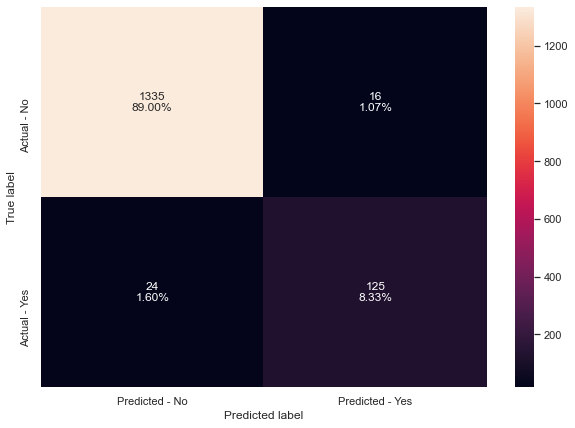

In [395]:
# Confusion Matrix
make_confusion_matrix(dTree,y_test)

In [396]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8389261744966443


**Observation:**
- As expected the recall score is 1 for the training data due to overfitting. The testing recall score is 0.83 which is not terrible.

### Visualize Decision Tree - Initial Model

In [397]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma County', 'County_S

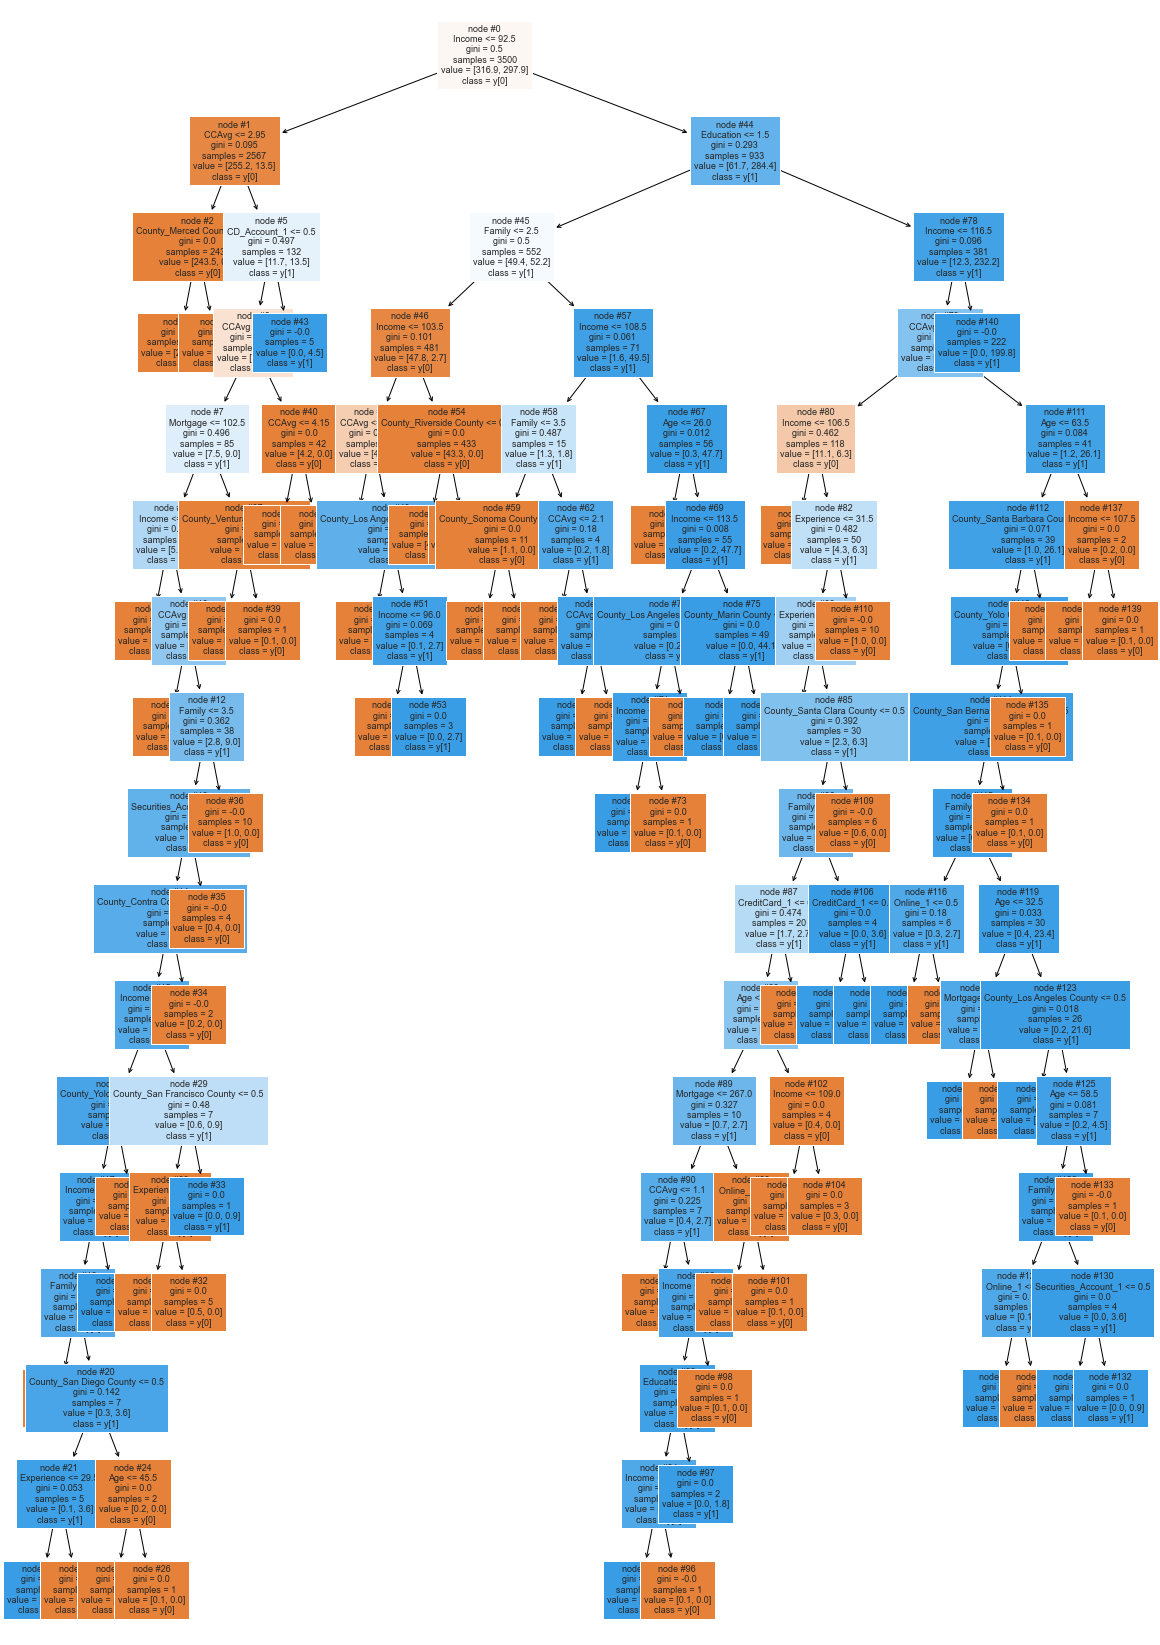

In [398]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()        

In [399]:
# Alternative visual as a Text Report to display rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Merced County <= 0.50
|   |   |   |--- weights: [243.40, 0.00] class: 0
|   |   |--- County_Merced County >  0.50
|   |   |   |--- weights: [0.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- County_Contra Costa County <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   | 

#### Importance of Features

In [400]:
# The (Gini) importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
Income                         6.306245e-01
Family                         1.495868e-01
Education                      8.886236e-02
CCAvg                          8.786717e-02
CD_Account_1                   7.690498e-03
Mortgage                       7.185811e-03
Experience                     6.304486e-03
Age                            4.021963e-03
County_Los Angeles County      2.763202e-03
Online_1                       2.344464e-03
County_San Francisco County    2.344464e-03
County_Santa Clara County      2.254161e-03
Securities_Account_1           1.878577e-03
CreditCard_1                   1.703663e-03
County_Yolo County             1.181885e-03
County_San Diego County        1.169795e-03
County_Contra Costa County     9.945408e-04
County_San Bernardino County   6.153682e-04
County_Santa Barbara County    6.063021e-04
County_Merced County           1.214785e-14
County_Riverside County        3.287218e-16
County_Marin County            4

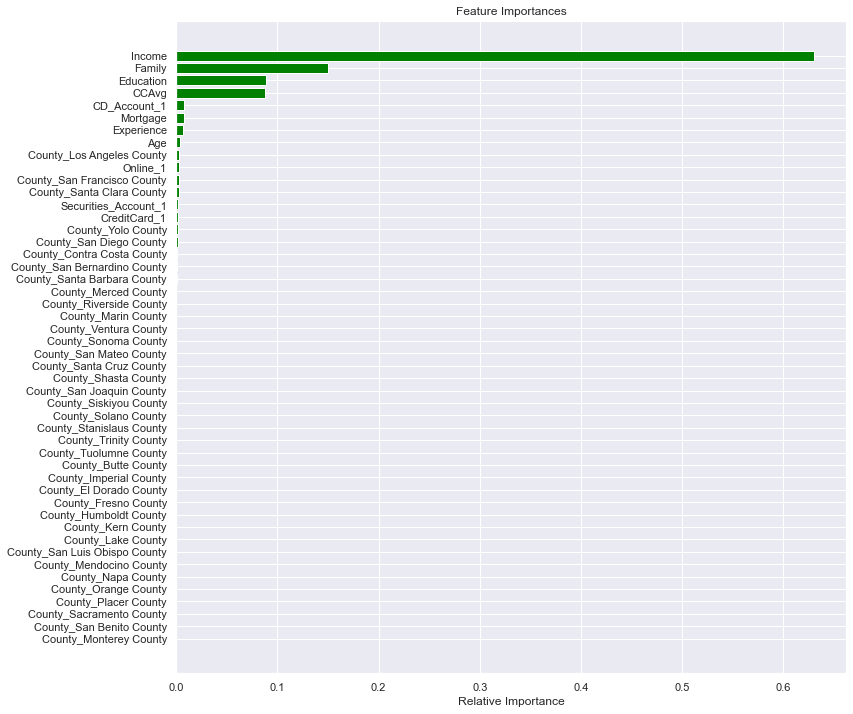

In [401]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- For this initial tree, the most important element is Income. This followed by Family.
- The initial decision tree is very complex. The recall of the training data is 1 and for the test data is 0.83.

## Reduce Overfitting

Let's first try pre-pruning with a maximum depth of 3.

#### Pre-pruning - Bound maximum depth

In [409]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, class_weight={0:0.1,1:0.9}, random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=3,
                       random_state=1)

#### Confusion Matrix - maximum depth of 3

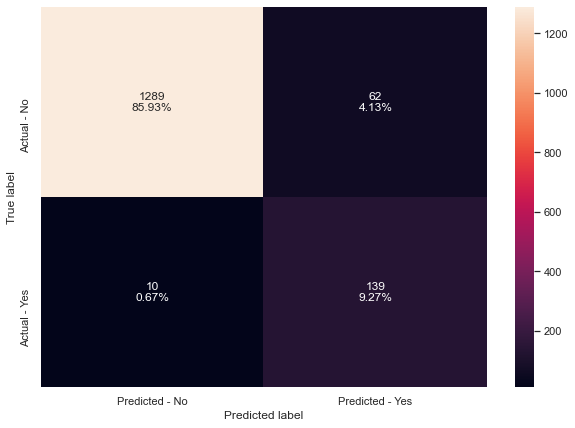

In [410]:
make_confusion_matrix(dTree1, y_test)

In [411]:
# Print accuracy of training data
print("Accuracy on training set : ",dTree1.score(X_train, y_train))

# Print accuracy of testing data
print("Accuracy on test set : ",dTree1.score(X_test, y_test))

# Print Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9565714285714285
Accuracy on test set :  0.952
Recall on training set :  0.9607250755287009
Recall on test set :  0.9328859060402684


###### **Observation:**
- Recall has decreased to 0.96 and 0.93 on training and testing data respectively when using a bound of maximum depth = 3. This is an improvement since the new model does not overfit the training data.

#### Visualize decision tree - maximum depth of 3

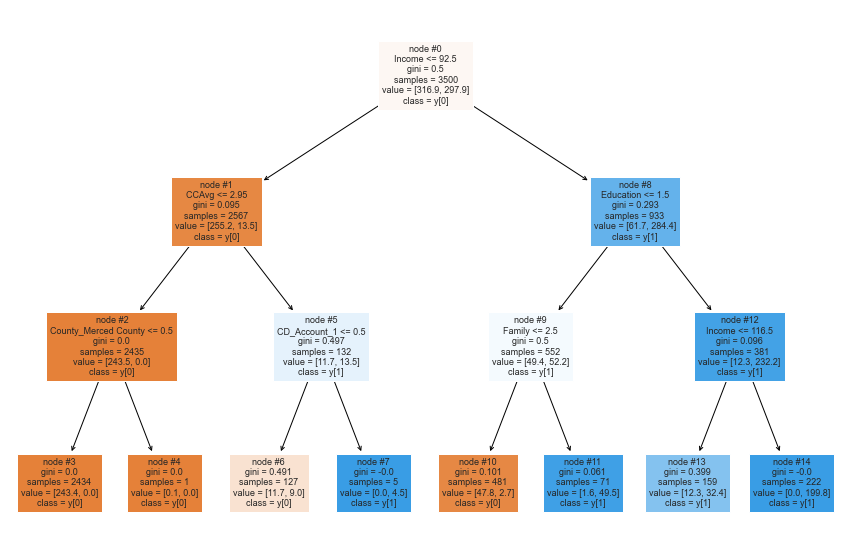

In [412]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()  

In [413]:
# Text report showing the rules of a decision tree - maximum depth of 3

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Merced County <= 0.50
|   |   |   |--- weights: [243.40, 0.00] class: 0
|   |   |--- County_Merced County >  0.50
|   |   |   |--- weights: [0.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- weights: [11.70, 9.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [12.30, 32.40] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 199.80] class: 1



In [414]:
# What are the important features?
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
Income                         6.851229e-01
Family                         1.570757e-01
Education                      1.006951e-01
CCAvg                          4.838764e-02
CD_Account_1                   8.718656e-03
County_Merced County           1.377192e-14
Age                            0.000000e+00
County_Santa Clara County      0.000000e+00
County_San Benito County       0.000000e+00
County_San Bernardino County   0.000000e+00
County_San Diego County        0.000000e+00
County_San Francisco County    0.000000e+00
County_San Joaquin County      0.000000e+00
County_San Luis Obispo County  0.000000e+00
County_San Mateo County        0.000000e+00
County_Santa Barbara County    0.000000e+00
County_Siskiyou County         0.000000e+00
County_Santa Cruz County       0.000000e+00
County_Shasta County           0.000000e+00
County_Riverside County        0.000000e+00
County_Solano County           0.000000e+00
County_Sonoma County           0

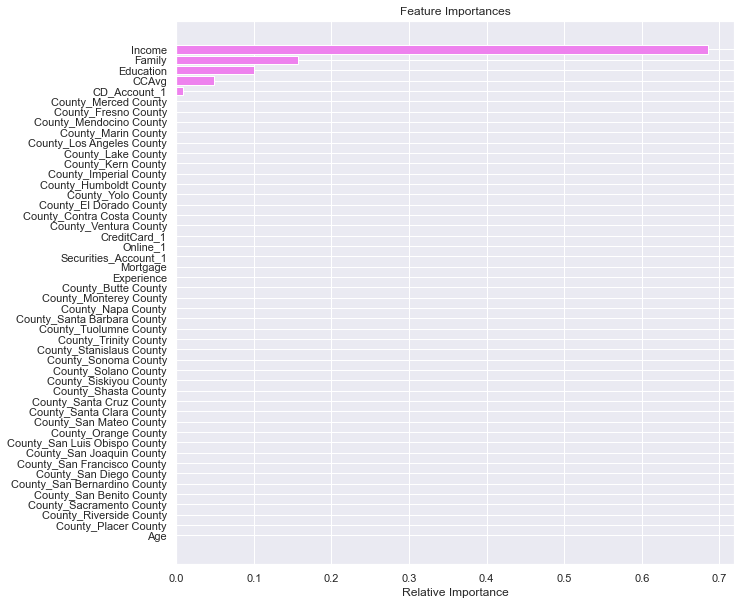

In [415]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**
- Income, Family, Education, CCAvg, and CD Account are the important features for this model listed in the order of importance.
- The maximum depth of 3 may be limiting the use of other features, so we will test other pruning methods.

#### Pre-pruning - Grid Search to tune hyperparameters

In [416]:
# Import necessary library
from sklearn.model_selection import GridSearchCV

In [418]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.1,1:0.9})

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 3, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)  # obtain grid search with hyperparameters
grid_obj = grid_obj.fit(X_train, y_train)    # obtain fit from training data

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_    # find the best estimator optimized by recall score

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)    # train the estimator again

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=2,
                       max_leaf_nodes=5, min_impurity_decrease=0.001,
                       random_state=1)

#### Confusion Matrix - tuned hyperparameter

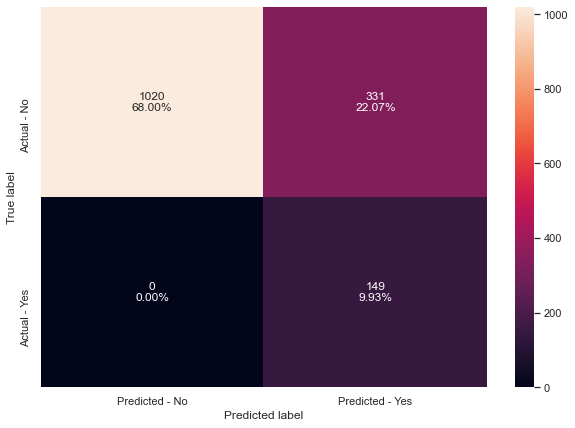

In [419]:
# confusion matrix with the best estimator
make_confusion_matrix(estimator,y_test)

In [420]:
# Print accuracy of training data
print("Accuracy on training set : ",estimator.score(X_train, y_train))

# Print accuracy of testing data
print("Accuracy on test set : ",estimator.score(X_test, y_test))

# Print Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7902857142857143
Accuracy on test set :  0.7793333333333333
Recall on training set :  1.0
Recall on test set :  1.0


**Observation:**
- The Recall has improved for training and testing data for this new model with tuned hyperparameters. But a value of 1 for training and testing data is suspicious since the Accuracy is 0.79 and 0.77 respectively.

#### Visualizing decision tree - tuned hyperparameters

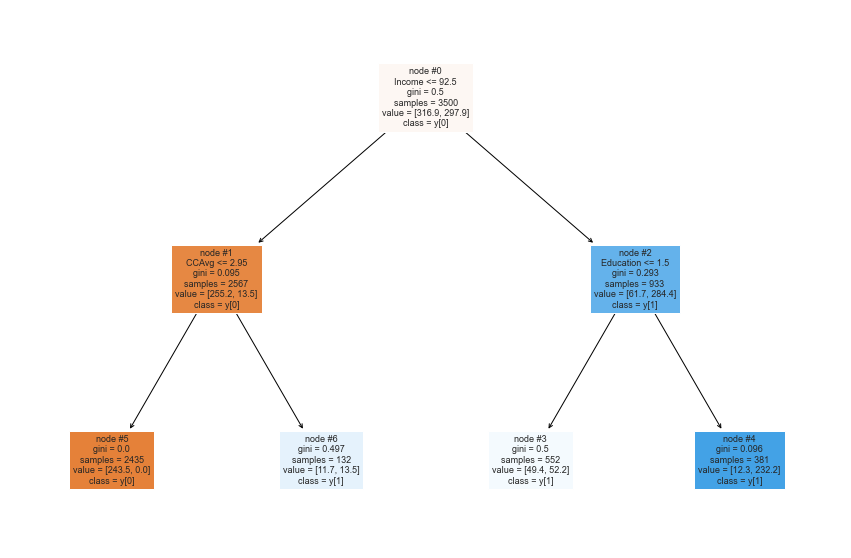

In [421]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()  

In [422]:
# Text report showing the rules of a decision tree - tuned hyperparameters

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [49.40, 52.20] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [12.30, 232.20] class: 1



In [423]:
# What are the important features?
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                    Imp
Income                         0.816803
Education                      0.123737
CCAvg                          0.059460
Age                            0.000000
County_Santa Clara County      0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Shasta County           0.000000
County_Santa Cruz County       0.000000
County_Placer County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000
County_Ventura County          0.000000


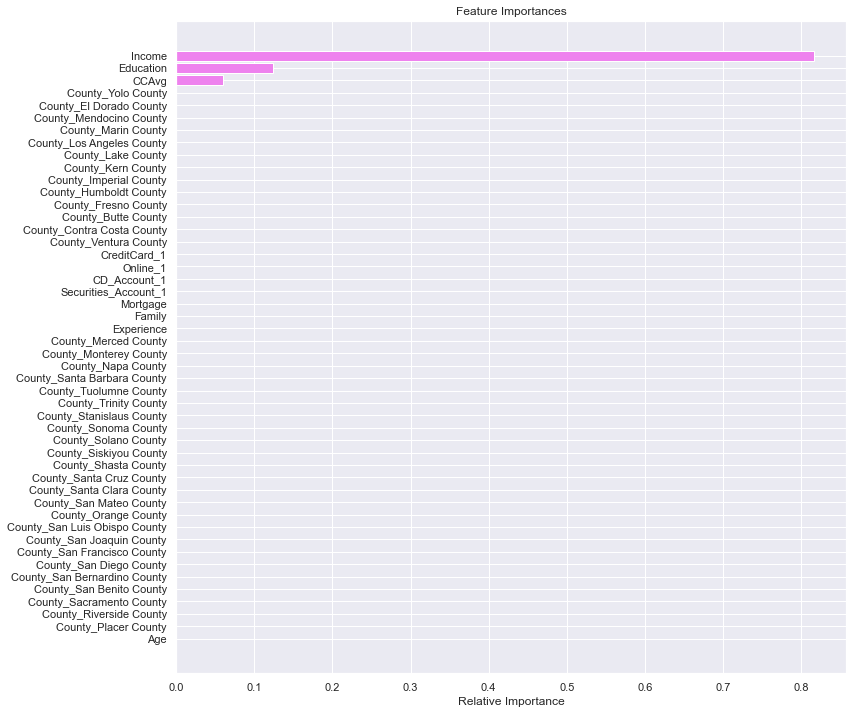

In [424]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Income, Education, and CC Avg are the important features for this model listed in the order of importance.
- Family and CD_Account are not factored in this model
- The optimized maximum depth is 10 and captures the CD Account feature.
- We will test another pruning method to see if better result can be achieved. Post-pruning may allow for more features not captured in pre-pruning.

#### Post-pruning - Cost Complexity Pruning

In [425]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.1,1:0.9}) # initiate decision tree classifier
path = clf.cost_complexity_pruning_path(X_train, y_train) # compute pruning paths

# isolate the alpha and impurity values
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [426]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -2.522399e-15
1   5.056318e-19 -2.521893e-15
2   7.584477e-19 -2.521134e-15
3   1.137672e-18 -2.519997e-15
4   1.300196e-18 -2.518697e-15
5   1.444662e-18 -2.517252e-15
6   1.986411e-18 -2.515266e-15
7   2.600392e-18 -2.512665e-15
8   9.029140e-18 -2.503636e-15
9   2.275343e-17 -2.480883e-15
10  2.389110e-17 -2.456991e-15
11  1.642039e-16 -2.292788e-15
12  2.419448e-16 -2.050843e-15
13  6.068124e-15  4.017281e-15
14  1.568454e-04  3.136909e-04
15  1.591186e-04  6.319280e-04
16  1.632060e-04  9.583400e-04
17  2.159672e-04  1.606241e-03
18  2.920570e-04  1.898299e-03
19  2.927781e-04  2.483855e-03
20  3.136909e-04  2.797546e-03
21  3.165169e-04  3.114063e-03
22  3.173588e-04  3.748780e-03
23  3.219261e-04  4.070706e-03
24  3.707367e-04  5.924390e-03
25  3.751817e-04  7.425116e-03
26  5.275869e-04  7.952703e-03
27  5.990667e-04  8.551770e-03
28  6.750008e-04  9.226771e-03
29  7.080002e-04  1.135077e-02
30  7.342114e-04  1.208498e-02
31  8.510178e-04  1.293600e-02
32  9.383915e-04  1.387439e-02
33  9.615100e-04  1.483590e-02
34  1.058707e-03  1.589461e-02
35  1.126004e-03  1.702061e-02
36  1.416358e-03  1.985333e-02
37  1.743294e-03  2.333992e-02
38  1.985898e-03  2.731171e-02
39  2.127748e-03  2.943946e-02
40  2.328917e-03  3.176838e-02
41  3.240232e-03  3.500861e-02
42  3.470671e-03  4.194995e-02
43  3.841577e-03  4.579153e-02
44  4.760264e-03  5.055179e-02
45  1.059696e-02  7.174571e-02
46  2.132036e-02  9.306606e-02
47  5.678893e-02  2.066439e-01
48  2.928785e-01  4.995225e-01

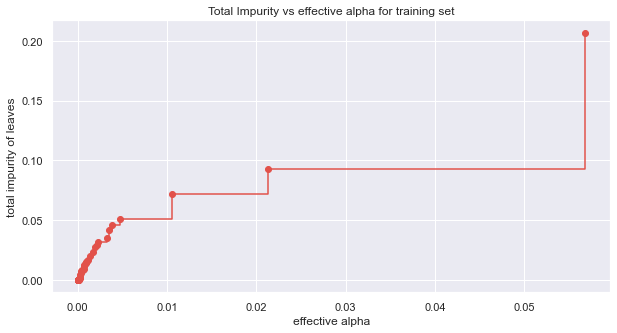

In [427]:
# plot alpha vs impurity
fig, ax = plt.subplots(figsize=(10,5))

# do not include the last alpha [:-1] that prunes entire tree
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post") 

ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [428]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800186


In the last alpha is the highest value (0.29) and has only one node. This alpha will be eliminated from the list because the data is not labeled.

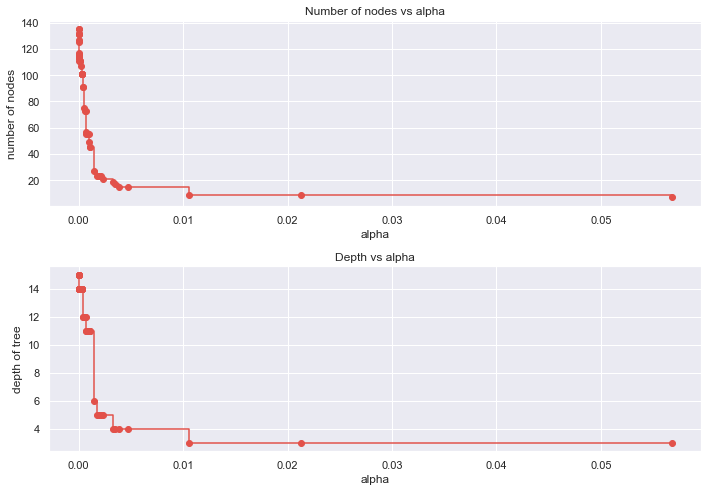

In [429]:
# remove the last row from the classifier and alphas since the last alpha prunes entire tree
clfs = clfs[:-1] 
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]    # create a list for the number of nodes
depth = [clf.tree_.max_depth for clf in clfs]    # create a list for the depth of the tree

# Plot out # of nodes vs alpha and depth of tree vs alpha
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [430]:
# Optimize Recall, find the recall for each tree - on training data
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [431]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [432]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

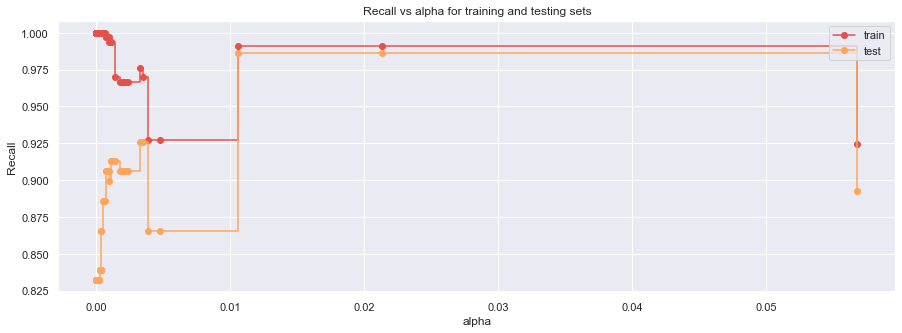

In [433]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Observations:**
- 

In [434]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.010596956293706815,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [435]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.010596956293706815,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Confusion matrix - cost complexity pruning

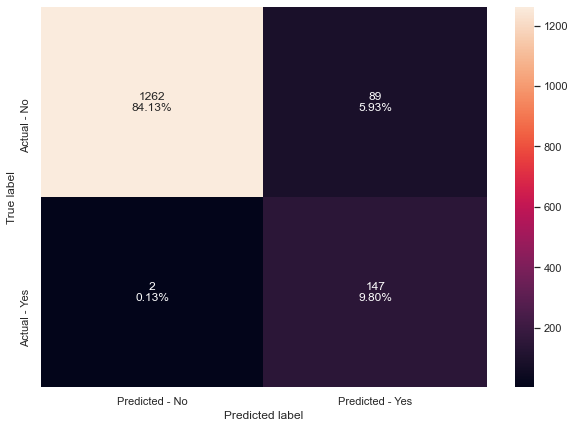

In [436]:
make_confusion_matrix(best_model,y_test)

In [437]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


#### Visualize decision tree - cost complexity pruning

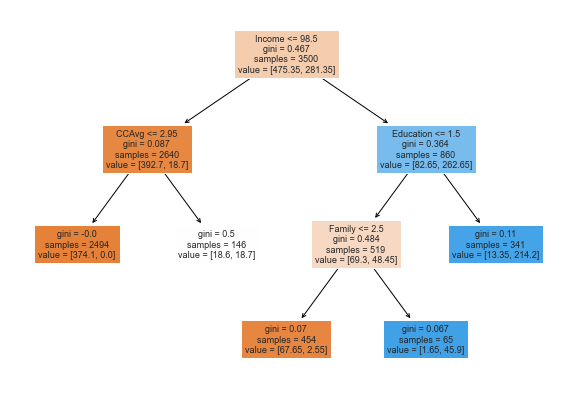

In [439]:
plt.figure(figsize=(10,7))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [440]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [13.35, 214.20] class: 1



In [441]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.636766
Family                         0.162232
Education                      0.144469
CCAvg                          0.056533
Age                            0.000000
County_Santa Clara County      0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Shasta County           0.000000
County_Santa Cruz County       0.000000
County_Placer County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000


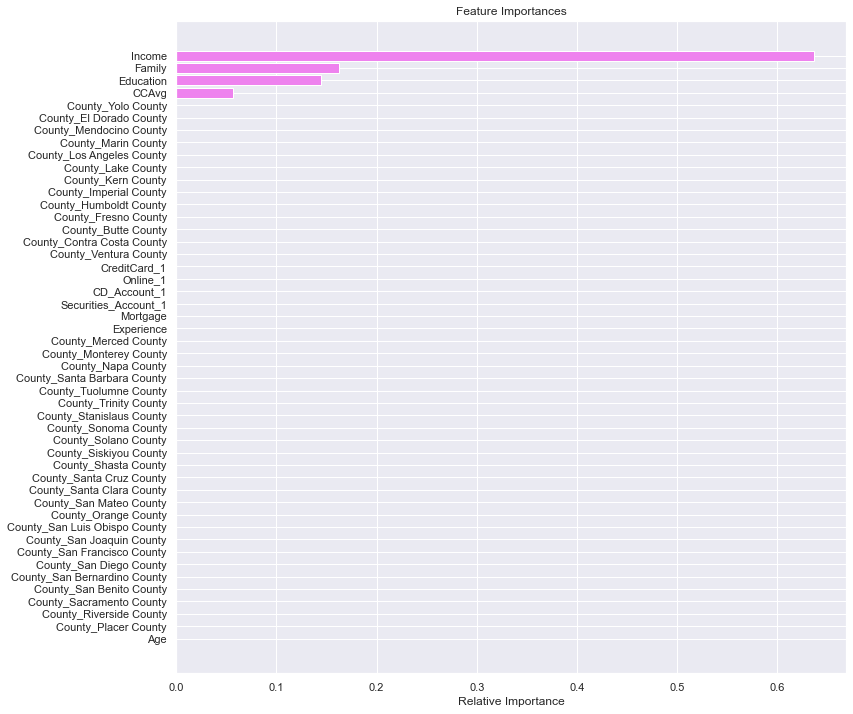

In [442]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Income, Famiily, Education, and CCAvg are the most important features for this model listed in the order of importance.

## Compare Decision Tree Models

In [443]:
compare_models = pd.DataFrame({'Model':['Initial Decision Tree Model','Decision Tree with Max depth of 3', 'Decision Tree with Hyperparameter Tuning',
                                          'Decision Tree with Post-pruning'], 'Train Recall':[1,0.96,1.0,0.98], 'Test Recall':[0.83,0.93,1.0,0.99]}) 
compare_models

Model  Train Recall  Test Recall
0               Initial Decision Tree Model          1.00         0.83
1         Decision Tree with Max depth of 3          0.96         0.93
2  Decision Tree with Hyperparameter Tuning          1.00         1.00
3           Decision Tree with Post-pruning          0.98         0.99

**Observations:**

- The decision tree with hyperparameter tuning gives the highest Recall Score on the Test data with a value of 1, but that is because there are no False Negatives.
- The cost-complexity model is the best because it has a better Accuracy (it has more TP and TN) and it has the fewer False Positives than the hyperparameter tuned model. The Test Recall for both of these models is very similar.
- Of all of the decision trees, the cost-complexity model would be recommended to target AllBank Customers. Therefore, Income, Family Size, Education, and CCAvg are all important features to consider when target Liability Customers.


## Compare Logistic Regression and Decision Tree Models 
- The test Recall of the Logistic Regression model (threshold 0.34) is 0.66.
- The test Recall of the Decision Tree model using cost-compexity pruning is 0.99.
- The Decision tree has the higher Recall.
- The test Precision of the Logistic Regression model (threshold 0.34) is 0.73.
- The test Precision of the Decision Tree model using cost-compexity pruning is 0.66.
- The Logistic Regression has the higher Precision.
- The test Accuracy of the Logistic Regression model (threshold 0.34) is 0.94.
- The test Accuracy of the Decision Tree model using cost-compexity pruning is 0.948.
- The Logistic Regrssion has the higher Precision.

## Conclusions
This Notebook has analyzed 5000 bank Customers characteristics using Logistic Regression and Decision trees to generate a predictive model.
The final model can be used to predict if an AllLife Liability Customer will take out a Personal Loan or not.
Decision trees, metric scores, lists of feature importances, and confusion matrices were generated to better understand each model.
Income, Education, Family Size, and aveage monthly Credit Card spend are the most important variables in predicting whether Customers will take out a Personal Loan or not.
Based upon the evaluation of the Logistic Regression statsmodel and the Decision tree, there is a model that can predict whether AllLife Bank Liability Customers will take out a Personal Loan. This model is a Decision tree based on Customer features such as Income, Education, Family Size, and Average Monthly Credit Card spend.

## Recommendations

- Customers with higher Education and Incomes and larger monthly credit card spends should be targeted for Personal Loans.
- Customers with larger Family sizes should be target for Personal Loans - this has a relative importance of 0.14.
- Customers with Credit Cards from other Banks should not be the focus of Personal Loans.
- Access to Online banking should not be considered in targeting Liability Customers.
- Age and Experience should not be considered in targeting Liability Customers.
- Customer Addresses should not be considered in targeting Liability Customers.
- Customer Mortgages should not be considered in targeting Liability Customers.
- Customer Securities Account should not be considered in targeting Liability Customers.
- The Bank should also consider targeting Customers with Mortgages as process to earn more interest. Liability Customers may not be interested in taking out Personal Loans, but in the current hot housing market, they may be interested in Mortgages for new homes.
- Since Online Banking is popular, the campaign to target Liability Customers can be run Online and reach a broader Customer base. This could reduce the number of False Negatives.
- Further hyperparameter testing can be run to tune the model.